<a href="https://colab.research.google.com/github/Fagner608/brasilian_houses/blob/main/brasil_casas_para_alugar_eda_visualiz_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise exploratória e machine learning**

## *Sobre o conjunto de dados*

Fonte: [kaggle](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent)

Descrição: *Este dataset possui 6079 casas para alugar com 13 classes diferentes.[...] Tendo em vista que foi utilizado um WebCrawler apenas para pegar os dados, os mesmos estão sujeitos a problemas como erros no cadastros.*

## **Motivação**

A empresa de seguros Seguros S.A. - já difunfida no mercado de seguro contra roubo de carga -, decidiu expandir seu portifólio, e pretende iniciar no mercado de seguro contra incêndio para imóveis alugados nos próximos 8 (oito) meses. O mercado se apresentou promissor diante das estatísticas ([ver](https://g1.globo.com/economia/noticia/2022/02/15/censo-da-moradia-70percent-dos-brasileiros-moram-em-imoveis-proprios-diz-quintoandar.ghtml)), e, também, pelo fato de que mesmo sendo um mercado super-concorrido, sempre haverá demanda, haja vista o seguro contra incêndio ser obrigatório por lei, conforme art. 22, VIII da Lei 8.245/91.

Assim, visando desenvolver uma estratégia de preços, a Seguros S.A. pretende conhecer o mercado, e obter as seguintes respostas:

1.  


# Carregando bibliotecas


In [ ]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import re

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from typing import Union

from pandas.core.computation.ops import isnumeric

from pandas.core.arrays import numeric

from matplotlib import cm

In [ ]:
sns.set(style="whitegrid", context="talk", font_scale=0.8, rc={"figure.figsize": (20, 8)})


# Carregando e visualizando base de dados.

In [ ]:
# Carregando
!wget -q 'https://raw.githubusercontent.com/Fagner608/brasilian_houses/main/houses_to_rent_v2.csv' -o dados.csv

In [ ]:
# Lendo
data = pd.read_csv('houses_to_rent_v2.csv')

In [ ]:
# Visualizando
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [ ]:
# Substituindo label do atributo 'floor', por ser palavra reservada do python

data.columns = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floors',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

# Dicionário de dados

- Obtido na documentação [disponível](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent).

| Atributo | Tipo de dado | Descrição |
|----------|--------------|-----------|
| city     | char         | Cidade onde o imóvel está localizada |
| area     | numeric         | Area do imovel |
| rooms     | numeric         | Numero de quartos |
|bathroom | numeric | Numero de banheiros |
| parking spaces     | numeric         | Numero de vagas |
| floor     | numeric         | Andar |
| animal     | char         | Aceita animais? |
| furniture     | char         | Mobilhada? |
| hoa (R\$)| numeric         | Valor do condomínio(em reais) |
| rent amount (R\$)	     | numeric         | Valor do aluguel(em reais) |
| property tax (R\$)     | numeric         | IPTU (imposto)(em reais) |
| fire insurance (R$)     | numeric         | Seguro incêndio(em reais)
|total (R\$) | numeric | Valor Total (em reais)



Trata-se de base de dados com informações que envolvem aluguel de imóvel. As informações dispónives ajudaram a responder às questões de negócio levantadas, e, observando que vieram acompanhadas do atributo 'fire insurance (R$)', serão úteis para modelos machine learning, de aprendizagem supervisionada.

Percebe-se a necessidade de limpar os dados, antes de analisá-los, vez que possui espaços em branco, caracteres especiais, etc, tanto nos rótulos do atributos, quanto na própria base.

A seguir, instanciaremos a base na classe criada para realizar este trabalho.

Não descartaremos nenhum dado ou atributo, a princípio, esta necessidade será verificada no decorrer da análise.

#Esclarecimentos

Verificando a necessidade de pré-processamento, e, estabelecidos os objetivos da análise, aplocaremos POO (programação orientada a objetos) à todas as fases da análise.

Foram criadas classes, com métodos e atributos específicos para este dataset, e, para o fluxo de trabalho, nesta ordem:

Pré-processamento > Análise exploratória e Data-wrangling > Machine Learning.

  - As classes herdam os atributos e métodos das criadas para a classe antecessora.

  - O fluxo acima poderá ser repetido quantas vezes foram necessário para se obter os resutados desejados.



## Para análise exploratória
### Classe para pré-processamento

In [ ]:

#criar classe aqui
class pre_processing(object):
    
    def __init__(self, dataframe = pd.DataFrame):
        
        self.data = dataframe
        
        self.data = self._empty_replace_columns()

    def _empty_replace_columns(self):
        
        self.data.columns = [i.replace(" ", "_") for i in data.columns]
        
        self.data.columns = [i.split("(R$)")[0] for i in data.columns]
        
        for coluna in self.data.select_dtypes('object').columns:
        
            self.data[coluna] = self.data[coluna].apply(lambda x: x.replace(" ", "_"))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: x.lower())
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[áàãâä]', 'a', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[éèêë]', 'e', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[íìîï]', 'i', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[óòõôö]', 'o', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[úùûü]', 'u', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[ç]', 'c', x))
        
        return self.data
    


### Classe para data wrangling.

In [ ]:

class data_wrangling(pre_processing):
    
    def __init__(self, dataframe = pd.DataFrame):
       
        pre_processing.__init__(self, dataframe)
       
        self.numeric_attributes = self._numeric_attributes()
        
        self.char_attributes = self._char_attributes()
        
        self.dataframe_out = self._drop_outliers()


    def tipagem(self, atributos: list = str, new_type: list = type):

      for atributo, types in zip(atributos, new_type):

        self.data[atributo] = self.data[atributo].apply(lambda x: types(x))

      self.numeric_attributes = self._numeric_attributes()

      self.char_attributes = self._char_attributes()

      temp_df = self._drop_outliers()
      
      self.dataframe_out = temp_df


      

    # Este método percorrerá todos os atributos tipados como numéricos, e verificará
    # a existência de elemento não numérico em seus dados    
    def verify_type_num(self):
      
      dado = {}
      
      for col in self.numeric_attributes:
      
        for item in self.data[col]:
      
          if not isnumeric(type(item)):
      
            dado[col] = item
      
      return pd.DataFrame(dado).reset_index(drop = True)

    # Este método percorrerá todos os atributos tipados como character|object, e verificará
    # a existência de elementos que não sejam alfa-numéricos em seus dados 
    def verify_type_char(self):        
     
      #verificar caracteres especuais 
     
      dado = {}
     
      for col in self.char_attributes:
     
        dado[col] = self.data[col].apply(lambda x: x if x in ['-', '*', '.'] else None)
     
      return pd.DataFrame(dado).drop_duplicates().reset_index(drop = True)


    def _numeric_attributes(self) -> list:
        
        colunas = self.data.columns
        
        numeric_attributes = list(filter(lambda col: self.data[col].dtype in ['int', 'float'], colunas))
        
        return numeric_attributes

    
    def _char_attributes(self) -> list:
        
        colunas = self.data.columns
        
        char_attributes = list(filter(lambda col: self.data[col].dtype  == "object", colunas))
        
        return char_attributes


    def count_unique_numeric(self):
       
        #contagem de valores unicos, por variável numérica
       
        unique_values = {}
       
        for col in self.numeric_attributes:
       
            unique = len(self.data[col].drop_duplicates())
       
            unique_values['{}'.format(col)] = unique
       
       
        data_unique_num = pd.DataFrame(unique_values, index = ['unique_values']).T
       
        describe_numeric = self.data.select_dtypes(['int', 'float']).describe().T
       
        count = pd.concat([describe_numeric, data_unique_num], axis = 1, join = 'inner')

        return count


    def count_unique_char(self):
       
        #contagem de valores unicos, por variável categoricos
       
        return self.data.select_dtypes('object').describe().T

         
    def ver_nome(self, atributo = str):
       
        print(pd.DataFrame(self.data[atributo].drop_duplicates().sort_values()).reset_index(drop = True))

        
    def na_values(self):
        
        print(pd.DataFrame(self.data.isnull().any()))
        
                      
    def drop_values(self, coluna: str, value: Union[str, int, float]) -> pd.DataFrame:
      
      clean_data = self.data.copy(deep = True)
      
      clean_data = clean_data.query('{} != "{}"'.format(coluna, value)).reset_index(drop = True)

      setattr(self, 'data', clean_data)

      self.dataframe_out = self._drop_outliers()


    def _drop_outliers(self):
      
        new_df = self.data.copy(deep = True)
      
        for i in self.numeric_attributes:
      
            desvio = self.data[i].std()
      
            limite_superior = self.data[i].mean() + 3*desvio
      
            limite_inferior = self.data[i].mean() - 3*desvio
      
            new_df = new_df.query("@limite_inferior <= {} <= @limite_superior".format(i))
      
            #print(i, desvio, limite_inferior, limite_superior)
      
        return new_df

##### DATA-VIZ


    def hist_boxplot(self, coluna: str):
      
            fig, axs = plt.subplots(1,2)
      
            grafico1 = sns.histplot(data=self.data, x = '{}'.format(coluna), ax = axs[0])
      
            grafico1.set(title = 'Distribuição de frequências - {}'.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
            grafico2 = sns.boxplot(data=self.data, x = '{}'.format(coluna), ax = axs[1])
      
            grafico2.set(title = 'Boxplot de frequências - {}'.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
            
    
    def outliers_in_out(self, coluna: str, hist_or_boxplot: ['hist', 'boxplot'], categoria = None):
      
        tipo_grafico = hist_or_boxplot
      
        if tipo_grafico == 'hist':
      
                fig, axs = plt.subplots(1,2)
      
                grafico1 = sns.histplot(data=self.data, x = '{}'.format(coluna), ax = axs[0])
      
                grafico1.set(title = 'Frequências com outliers - {} '.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
                grafico2 = sns.histplot(data=self.dataframe_out, x = '{}'.format(coluna), ax = axs[1])
      
                grafico2.set(title = 'Frequências sem outliers - {} '.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
        elif tipo_grafico == 'boxplot':
      
                fig, axs = plt.subplots(1,2)
      
                grafico1 = sns.boxplot(data=self.data, y = '{}'.format(coluna), x = categoria, ax = axs[0])
      
                grafico1.set(title = 'Frequências com outliers - {} '.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
                grafico2 = sns.boxplot(data=self.dataframe_out, y = '{}'.format(coluna), x = categoria, ax = axs[1])
      
                grafico2.set(title = 'Frequências sem outliers - {} '.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
        else:
      
            print("Você escolheu um tipo errado. Escolha entre 'hist' ou 'boxplot'")
            
    
    def bar_graphic(self, atributo: str, categoria: str, drop_outlier: bool = True, hue: str = None):
      
        if drop_outlier:
          
          grafico = sns.barplot(data = self.dataframe_out, y = atributo, x = categoria, hue = hue, ci = None)  
        
        else:

          grafico = sns.barplot(data = self.dataframe_out, y = atributo, x = categoria, hue = hue, ci = None)

        grafico.set(title = f'{atributo} por {categoria}', ylabel = f'{atributo}', xlabel = f'{categoria}')



    def pie_chart(self, atributo: str, group: str, summarise: str = 'sum'):

      dados = self.dataframe_out.copy(deep = True)

      dados = dados[[f'{atributo}', f'{group}']].groupby(by = group).agg(f'{summarise}')

      dados['relative'] = dados[f'{atributo}'].apply(lambda x: round(x / dados[f'{atributo}'].sum() * 100, 2))

      labels = [str(i) + " " + '[' + str(dados.loc[f'{i}', 'relative']) + "%" + "]" for i in dados.index]
      
      cs = cm.Set3(np.arange(100))
    
      f = plt.figure(figsize=(10,5))

      plt.pie(dados['relative'], labeldistance = 1, radius= 3, colors = cs, wedgeprops = dict(width = 0.8))

      plt.legend(labels = labels, loc = "center", prop = {'size':12})

      plt.title("{} por /\n {}".format(atributo, group), loc = "Center", fontdict = {"fontsize": 17, "fontweight":17})
      
      plt.show()


    def cor_matrix(self, atributos: list = None, coeficiente: str = 'pearson'):
      
      if atributos is None:
        
        atributos = self.numeric_attributes

      data = self.dataframe_out[atributos].corr(method = f'{coeficiente}')

      sns.heatmap(data = data, annot = True, cmap='hot')

    
    def pair_plots(self, atributos: list = None, coeficiente: str = 'pearson'):

      if atributos is None:

        atributos = self.numeric_attributes

      with sns.axes_style('whitegrid'):

        grafico1 = sns.pairplot(data = self.dataframe_out[atributos], diag_kind='kde')

        grafico1.map_lower(sns.kdeplot, levels=4, color=".2")


    def scatterplots(self, x: str, y: str, hue: str = None):

      grafico = sns.scatterplot(data = self.dataframe_out, x = x, y = y, hue = hue)

      grafico.set(title = f'Relação entre {x} e {y}', xlabel = f'{x}', ylabel = f'{y}')

      if hue is not None:

          grafico.get_legend().set_title(f'{hue}')

    #incluir estatisticas basicas nesta classe     - ver referências

## Para machine learning
### Classe para padronização de variáveis (numéricas e categóricas)

In [ ]:
#criar classe de pré-processamento da variáveis para modelos aqui

class standardize_code(data_wrangling):
    
    def __init__(self, dataframe = pd.DataFrame):
  
        data_wrangling.__init__(self, dataframe)
        
        
    def standardize(self, target : str = None) -> pd.DataFrame:
  
        standardized_df = self.dataframe_out.copy(deep = True)
  
        for i in self.numeric_attributes:
  
            if i == target:
  
                continue
  
            else:
  
                media = standardized_df[i].mean()
  
                desvio = standardized_df[i].std()
  
                standardized_df[i] = standardized_df[i].apply(lambda x: (x - media) / desvio)
        
        #codificando atributos categóricos
  
        for col in self.char_attributes:
  
            for dado in standardized_df[col].drop_duplicates():
  
                standardized_df[col + "_" + dado + '_code'] = standardized_df[col].apply(lambda x: 1 if x == dado else 0)
  
        standardized_df.drop(self.char_attributes, axis = 1, inplace = True)
  
        setattr(self, "standardized_df", standardized_df)
  
        setattr(self, "target", target)
          

### Classe para realizar agrupamento

In [ ]:
#criar classe de clusters aqui

class cluster(standardize_code):
    
    def __init__(self, dataframe = pd.DataFrame):
 
        standardize_code.__init__(self, dataframe)
        

    def elbow_method(self, range_n : int = 10): 
 
      data_k = self.standardized_df.copy(deep = True)
 
      wcss = []
 
      for k in range(1,range_n):
 
        model = KMeans(n_clusters = k).fit(data_k)
 
        wcss.append(model.inertia_)
 
      #Calculating the variance ratio
 
      variance_ratios = [wcss[i]/wcss[i-1] for i in range(1,range_n-1)]
 
      optimal_k = variance_ratios.index(min(variance_ratios)) + 2
 
      #visualizando
 
      grafico = sns.lineplot(x = range(1,range_n), y = wcss, marker = '8', palette = 'pastel')
 
      grafico.figure.set_size_inches(30,10)
 
      print(optimal_k)
 
      setattr(self, 'optimal_k',optimal_k)


    def k_means(self, clusters = int):
 
        data_k = self.standardized_df.copy(deep = True)
 
        model = KMeans(n_clusters = clusters).fit(data_k)
 
        clusters_label = pd.DataFrame(model.labels_, columns=['cluster'])
 
        print(clusters_label)


        clustered = pd.concat([data_k, clusters_label], axis = 1, join = 'inner')
 
        setattr(self, "clustered_data", clustered)

        #mensagem de erro aparece porque, ao instanciar uma class em custer, primeiro deve-se chamar o metodo standardize para a padronizacao

### Classe para split de dados

In [ ]:
#criando classe para segmentar os fatores
class df_factors(cluster):

    def __init__(self, dataframe = pd.DataFrame):

        cluster.__init__(self, dataframe)


    def factors(self, coluna: str):

        fatores = pd.factorize(self.data[coluna])[1]

        for i, fator in enumerate(fatores):

            df = self.data.query('{} == "{}"'.format(coluna, fator)).reset_index(drop = True)

            setattr(self, "df_"+str(fator), df)


### Classe para regressao linear

In [ ]:
#criar classe para regressao aqui

class linear_regression(cluster):

  def __init__(self, dataframe = pd.DataFrame):
 
    cluster.__init__(self, dataframe)


  def bases(self, test_size: float = 0.25): 
 
    base = self.standardized_df.copy(deep = True)
 
    #base = base[[x, y]]
 
    preditores_treino, preditores_teste, target_treino, target_teste = train_test_split(
 
        base.drop(['{}'.format(self.target)], axis = 1),
 
        base['{}'.format(self.target)],
 
        test_size = test_size,
 
        random_state = 123
 
        )
 
    setattr(self, 'preditor_treino', preditores_treino)
 
    setattr(self, 'preditor_teste', preditores_teste)
 
    setattr(self, 'target_treino', target_treino)
 
    setattr(self, 'target_teste', target_teste)


  def linear_regression(self):

    model = LinearRegression().fit(self.preditor_treino, self.target_treino)

    target_predict = model.predict(self.preditor_teste)

    rmse = np.sqrt(mean_squared_error(self.target_teste, target_predict))

    setattr(self, 'coeficiente', model.coef_)

    setattr(self, 'intercepto', model.intercept_)

    setattr(self, 'rmse', rmse.round(2))






# Dicionário de classes

|CLASSES|FUNCIONALIDADE|FASE|
|------|-------------|------|
|pre_processing()| Elimina espaços em branco, caracteres especiais|Pré-processamento|
|data_wrangling() | Dispõe de métodos para exploração de dados e data-viz|Data-wrangling e data-viz|
|standardize_code() | Padroniza atributos numéricos, e codifica atributos categórios| Machine Learning|
|cluster()|Aplica algoritmos de aprendizado não-supervisionado para clusterização de dados|Machine Learning|
|df_factors| Realiza split de dados (faz splite de DF de acordo com a categoria informada|Machine Learning|
|linear_regression|Faz split de bases (teste-treino), aplica modelo de regressão, e retorna métricas de desempenho|Machine Learning|


# **Análise exploratória de dados**



## **1. Pré-processamento**
#####  - Classe usada: pre_processing()

Como as classes herdam atributos e métodos das classes antecessoras, conforme definido no fluxo desta análise - acima mencionado -, e, uma vez já definido que usaremos o modelo de regressão linear para realizar análise e predições dos dados, vamos instanciar nossos dados na classe linear_regression, e, após, utilizados os métodos e atributos disponívels de todas as demais classes.

Isto otimizará a análise, e evitará confusão entre possíveis slicing de dados que poderemos criar futuramente.

In [ ]:
# Visualizando a base da dados orginal
data.head(10)

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa_,rent_amount_,property_tax_,fire_insurance_,total_
0,sao_paulo,70,2,1,1,7,acept,furnished,2065.0,3300.0,211.0,42.0,5618.0
1,sao_paulo,320,4,4,0,20,acept,not_furnished,1200.0,4960.0,1750.0,63.0,7973.0
2,porto_alegre,80,1,1,1,6,acept,not_furnished,1000.0,2800.0,0.0,41.0,3841.0
3,porto_alegre,51,2,1,0,2,acept,not_furnished,270.0,1112.0,22.0,17.0,1421.0
4,sao_paulo,25,1,1,0,1,not_acept,not_furnished,0.0,800.0,25.0,11.0,836.0
5,sao_paulo,376,3,3,7,-,acept,not_furnished,0.0,8000.0,834.0,121.0,8955.0
6,rio_de_janeiro,72,2,1,0,7,acept,not_furnished,740.0,1900.0,85.0,25.0,2750.0
7,sao_paulo,213,4,4,4,4,acept,not_furnished,2254.0,3223.0,1735.0,41.0,7253.0
8,sao_paulo,152,2,2,1,3,acept,furnished,1000.0,15000.0,250.0,191.0,16440.0
9,rio_de_janeiro,35,1,1,0,2,acept,furnished,590.0,2300.0,35.0,30.0,2955.0


Conforme já verificado, os labels dos atributos possuem espaços em branco, e caracters especiais, a maioria das funções não conseguem lidar com esses caracteres. Para evitar problemas futuros com execução de análises e geração de gráficos, A classe pre-processing aplicou os métodos desenvolvidos para este tratamento.

In [ ]:
# Instanciando base de dados na classe 'pre-proce
analise_1 = linear_regression(dataframe = data)

In [ ]:
# Visualizando base de dados tratada
analise_1.data.head(10)

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa_,rent_amount_,property_tax_,fire_insurance_,total_
0,sao_paulo,70,2,1,1,7,acept,furnished,2065.0,3300.0,211.0,42.0,5618.0
1,sao_paulo,320,4,4,0,20,acept,not_furnished,1200.0,4960.0,1750.0,63.0,7973.0
2,porto_alegre,80,1,1,1,6,acept,not_furnished,1000.0,2800.0,0.0,41.0,3841.0
3,porto_alegre,51,2,1,0,2,acept,not_furnished,270.0,1112.0,22.0,17.0,1421.0
4,sao_paulo,25,1,1,0,1,not_acept,not_furnished,0.0,800.0,25.0,11.0,836.0
5,sao_paulo,376,3,3,7,-,acept,not_furnished,0.0,8000.0,834.0,121.0,8955.0
6,rio_de_janeiro,72,2,1,0,7,acept,not_furnished,740.0,1900.0,85.0,25.0,2750.0
7,sao_paulo,213,4,4,4,4,acept,not_furnished,2254.0,3223.0,1735.0,41.0,7253.0
8,sao_paulo,152,2,2,1,3,acept,furnished,1000.0,15000.0,250.0,191.0,16440.0
9,rio_de_janeiro,35,1,1,0,2,acept,furnished,590.0,2300.0,35.0,30.0,2955.0


- Os labels dos atributos não possuem mais do caracter 'R$', nem espaços em branco.

- Os dados das colunas categóricas também tiveram tratamento para espaços em branco, bem como para caracteres com acentos, e 'ç'.

- Entretanto, observa-se que permanece o caracter '-' como dado do atributo 'floor', certamente inserido como formad e tratar a ausência de informação da fonto, especialmente porque os dados foram obtidos com um crowler, conforme citado na [documentação](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent). Vamos tratar deste problema na próxima na análise exploratória dos dados, e decidir como lidar com isto depois de conhecer melhor seu inpacto nos dados.

## **2. Data wrangling**

  ##### - Classe usada: data_wrangling()


In [ ]:
# Conhecendo atributos numéricos
analise_1.numeric_attributes

['area',
 'rooms',
 'bathroom',
 'parking_spaces',
 'hoa_',
 'rent_amount_',
 'property_tax_',
 'fire_insurance_',
 'total_']

Vamos verificar como os valores estão dispostos dentro de cada variável, e, conferir sua respectiva tipagem na base de dados.

In [ ]:
# Atributo 'area'
analise_1.ver_nome('area')

      area
0       11
1       12
2       13
3       15
4       16
..     ...
512   1600
513   2000
514  12732
515  24606
516  46335

[517 rows x 1 columns]


In [ ]:
# Verificando tipo do atriburo 'area'

analise_1.data['area'].dtype

dtype('int64')

Os dados, do tipo *int*, estão dispostos como numéricos (numérico-contínuo), o que é esperado, vez que a área de um imóvel é obtido através da unidade M2 (metro quadrado).

In [ ]:
# Atributo 'rooms'

analise_1.ver_nome('rooms')

    rooms
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     13


In [ ]:
# Verificando tipo do atriburo 'rooms'

analise_1.data['rooms'].dtype

dtype('int64')

Os dados, do tipo *int*, estão dispostos como numéricos (numérico-discreto), o que é esperado, vez que a quantidade de quartos de um imóvel se obtem através de contagem, representados por números inteiros.

In [ ]:
# Atributo 'rooms'

analise_1.ver_nome('bathroom')

   bathroom
0         1
1         2
2         3
3         4
4         5
5         6
6         7
7         8
8         9
9        10


In [ ]:
# Verificando tipo do atriburo 'bathroom'

analise_1.data['bathroom'].dtype

dtype('int64')

Os dados, do tipo *int*, estão dispostos como numéricos (numérico-discreto), o que é esperado, vez que a quantidade de banheiros de um imóvel se obtem através de contagem, representados por números inteiros.

In [ ]:
# Atributo 'parking_spaces'

analise_1.ver_nome('parking_spaces')

    parking_spaces
0                0
1                1
2                2
3                3
4                4
5                5
6                6
7                7
8                8
9               10
10              12


In [ ]:
# Verificando tipo do atriburo 'parking_spaces'

analise_1.data['parking_spaces'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-discreto), o que é esperado, vez que este atributo representa a quantidade de vagas de garagem disponíveis (e, não a sua área), o que é repesentado por contagem, utilizando-se numeros inteiros.

In [ ]:
# Atributo 'hoa_'

analise_1.ver_nome('hoa_')

         hoa_
0           0
1           1
2           3
3          10
4          15
...       ...
1674    32000
1675    81150
1676   200000
1677   220000
1678  1117000

[1679 rows x 1 columns]


In [ ]:
# Verificando tipo do atriburo 'parking_spaces'

analise_1.data['hoa_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores.
Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para *float*.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

In [ ]:
# Atributo 'rent_amount_'

analise_1.ver_nome('rent_amount_')

      rent_amount_
0              450
1              460
2              500
3              503
4              505
...            ...
1190         20000
1191         24000
1192         25000
1193         30000
1194         45000

[1195 rows x 1 columns]


In [ ]:
# Verificando tipo do atriburo 'rent_amount_'

analise_1.data['rent_amount_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores. Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para float.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

In [ ]:
# Atributo 'property_tax_'

analise_1.ver_nome('property_tax_')

      property_tax_
0                 0
1                 1
2                 2
3                 3
4                 4
...             ...
1238          10830
1239          12500
1240          21880
1241          28120
1242         313700

[1243 rows x 1 columns]


In [ ]:
# Verificando tipo do atriburo 'property_tax_'

analise_1.data['property_tax_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores. Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para float.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

In [ ]:
# Atributo 'fire_insurance_'

analise_1.ver_nome('fire_insurance_')

     fire_insurance_
0                  3
1                  4
2                  5
3                  6
4                  7
..               ...
211              305
212              338
213              376
214              451
215              677

[216 rows x 1 columns]


In [ ]:
# Verificando tipo do atriburo 'fire_insurance_'

analise_1.data['fire_insurance_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores. Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para float.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

In [ ]:
# Atributo 'total_'

analise_1.ver_nome('total_')

       total_
0         499
1         507
2         508
3         509
4         545
...       ...
5746    95610
5747   222100
5748   233200
5749   316900
5750  1120000

[5751 rows x 1 columns]


In [ ]:
# Verificando tipo do atriburo 'total_'

analise_1.data['total_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores. Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para float.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

Conclui-se, após a verificação da tipagem dos dados, que se faz necessária a correção do tipo para os atributos: 

      hoa_
      rent_amount_
      property_tax_
      fire_insure_
      total_


Para estes atributos, atribuiremos o tipo *float*, pelos motivos já expostos.

In [ ]:
# Atribuindo novo tipo para os atributos listados

lista_atributos = ['hoa_', 'rent_amount_', 'property_tax_', 'fire_insurance_', 'total_' ]
lista_tipos = [float, float, float, float, float]

analise_1.tipagem(atributos=lista_atributos, new_type=lista_tipos)

In [ ]:
# Verificando tipagem das classes

analise_1.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             10692 non-null  object 
 1   area             10692 non-null  int64  
 2   rooms            10692 non-null  int64  
 3   bathroom         10692 non-null  int64  
 4   parking_spaces   10692 non-null  int64  
 5   floors           10692 non-null  object 
 6   animal           10692 non-null  object 
 7   furniture        10692 non-null  object 
 8   hoa_             10692 non-null  float64
 9   rent_amount_     10692 non-null  float64
 10  property_tax_    10692 non-null  float64
 11  fire_insurance_  10692 non-null  float64
 12  total_           10692 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.1+ MB


Realizada a correção de tipo dos atributos, vamos aplicar o método 'verify_type_num()' à base de dados. Este método percorrerá todos os elementos, de cada atributo numérico, e, se houver alguem elemento não numérico, o retornará; se não, retornará vazio.

In [ ]:
# Aplicando método para verificar existência de valores não numéricos no atributo 'area'

analise_1.verify_type_num()

""


O método 'verify_type_num()' confirmou que só existem dados numéricos nos atributos assim tipados.

Agora, vamos repetir o processo acima para os atributos categóricos.

In [ ]:
# Conhecendo atributos categóricos
analise_1.char_attributes

['city', 'floors', 'animal', 'furniture']

Vamos verificar como os valores estão dispostos dentro de cada variável, e, conferir sua respectiva tipagem na base de dados.

In [ ]:
# Atributo 'city'

analise_1.ver_nome('city')

             city
0  belo_horizonte
1        campinas
2    porto_alegre
3  rio_de_janeiro
4       sao_paulo


In [ ]:
# Verificando tipo do atriburo 'city'

analise_1.data['city'].dtype

dtype('O')

Os dados, do tipo *o* (*object*, oriundo do pacote pandas para representar o tipo *character*), representam as cidades em que os dados foram colateados.

In [ ]:
# Atributo 'floors'

analise_1.ver_nome('floors')

   floors
0       -
1       1
2      10
3      11
4      12
5      13
6      14
7      15
8      16
9      17
10     18
11     19
12      2
13     20
14     21
15     22
16     23
17     24
18     25
19     26
20     27
21     28
22     29
23      3
24    301
25     32
26     35
27      4
28     46
29      5
30     51
31      6
32      7
33      8
34      9


In [ ]:
# Verificando tipo do atriburo 'floors'

analise_1.data['floors'].dtype

dtype('O')

Os dados, do tipo o (object, oriundo do pacote pandas para representar o tipo character), representam o andar do imóvel objeto da locação.

Deve-se eliminar o caracter '-', coforme já mencionado antes.

Uma situação interessante. O atributo 'floor' pode represetar uma variável numérica-discreta, ou uma variável categórica, a depender do contexto.

No presente caso, estudá-lo como variável discreta pode trazer vantagem à nossa análise, vez que, pode haver influência da do andar em que se encontra o imóvel, para determinação do valor do seguro. Caso seja verificado sua insignificância estatística para determinação do objetivo desta análise, podemos retomá-la como variável categórica.

Por isso, realizaremos a eliminação do caracter especial "-" inserido nos dados, e, posteriormente, atribuiremos o tipo *int* aos dados, pois representam melhor o atributo 'floor' como variável numérica-discreta.

Vamos avaliar o impacto deste 'erro' na base de dados, depois de observarmos o restante das variáveis categóricas.
  

In [ ]:
# Atributo 'animal'

analise_1.ver_nome('animal')

      animal
0      acept
1  not_acept


In [ ]:
# Verificando tipo do atriburo 'animal'

analise_1.data['animal'].dtype

dtype('O')

Os dados, do tipo o (object, oriundo do pacote pandas para representar o tipo character), representam se o imóvel aceita, ou não, a convivência de animais.

In [ ]:
# Atributo 'furniture'

analise_1.ver_nome('furniture')

       furniture
0      furnished
1  not_furnished


In [ ]:
# Verificando tipo do atriburo 'furniture'

analise_1.data['furniture'].dtype

dtype('O')

Os dados, do tipo o (object, oriundo do pacote pandas para representar o tipo character), representam se o imóvel possui mobilha, ou não.

In [ ]:
# Verificando a existência de caracteres que não sejam alfanuméricos em atributos categórios

analise_1.verify_type_char()

,city,floors,animal,furniture
0,None,None,None,None
1,None,-,None,None


Novamente, confirmada a existência do caracter "-" no atributo floor.

Iniciando tratamento do caracter 'floor'

In [ ]:
# Verificando proporção comprometida dos dados

dados_comprometidos = analise_1.data.query('floors == "-"').count()['floors']

print(f'O caracter "-" comprometeu {round(dados_comprometidos / analise_1.data.shape[0] * 100,2)}% dos dados')

O caracter "-" comprometeu 0.0% dos dados


In [ ]:
# Verificando shape dos dados - sem tratamento

analise_1.data.shape

(10692, 13)

In [ ]:
# Eliminando linhas que contenham o caracter '-'

analise_1.drop_values(coluna = 'floors', value = '-')

In [ ]:
# Tipagem do atributo florr

analise_1.tipagem(new_type= [int], atributos = ['floors'])

In [ ]:
analise_1.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             8231 non-null   object 
 1   area             8231 non-null   int64  
 2   rooms            8231 non-null   int64  
 3   bathroom         8231 non-null   int64  
 4   parking_spaces   8231 non-null   int64  
 5   floors           8231 non-null   int64  
 6   animal           8231 non-null   object 
 7   furniture        8231 non-null   object 
 8   hoa_             8231 non-null   float64
 9   rent_amount_     8231 non-null   float64
 10  property_tax_    8231 non-null   float64
 11  fire_insurance_  8231 non-null   float64
 12  total_           8231 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 836.1+ KB


In [ ]:
# Verificando a existência de caracteres que não sejam alfa-numéricos, nos atributos categóricos

analise_1.verify_type_char()

,city,animal,furniture
0,None,None,None


Agora, nosso dataset não possui espaços em brancos, caracteres especiais ou qualquer outro símbolo que impeça a correta tipagem dos dados.

Vamos observar, novamente, o shape dos dados e ver se está tudo em ordem para seguir em frente com o data wangling, onde iremos calcular e visualzar alguas estatísticas e características sobre os dados.

In [ ]:
analise_1.data.head()

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa_,rent_amount_,property_tax_,fire_insurance_,total_
0,sao_paulo,70,2,1,1,7,acept,furnished,2065.0,3300.0,211.0,42.0,5618.0
1,sao_paulo,320,4,4,0,20,acept,not_furnished,1200.0,4960.0,1750.0,63.0,7973.0
2,porto_alegre,80,1,1,1,6,acept,not_furnished,1000.0,2800.0,0.0,41.0,3841.0
3,porto_alegre,51,2,1,0,2,acept,not_furnished,270.0,1112.0,22.0,17.0,1421.0
4,sao_paulo,25,1,1,0,1,not_acept,not_furnished,0.0,800.0,25.0,11.0,836.0


In [ ]:
analise_1.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             8231 non-null   object 
 1   area             8231 non-null   int64  
 2   rooms            8231 non-null   int64  
 3   bathroom         8231 non-null   int64  
 4   parking_spaces   8231 non-null   int64  
 5   floors           8231 non-null   int64  
 6   animal           8231 non-null   object 
 7   furniture        8231 non-null   object 
 8   hoa_             8231 non-null   float64
 9   rent_amount_     8231 non-null   float64
 10  property_tax_    8231 non-null   float64
 11  fire_insurance_  8231 non-null   float64
 12  total_           8231 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 836.1+ KB


In [ ]:
# verificando valores unicos - caracteres

analise_1.count_unique_char()

,count,unique,top,freq
city,8231,5,sao_paulo,4273
animal,8231,2,acept,6323
furniture,8231,2,not_furnished,5979


In [ ]:
# verificando valores nulos

analise_1.na_values()

                     0
city             False
area             False
rooms            False
bathroom         False
parking_spaces   False
floors           False
animal           False
furniture        False
hoa_             False
rent_amount_     False
property_tax_    False
fire_insurance_  False
total_           False


Por fim, a base de dados ficou com 8.231 obserações, contendo 13 atributos. Todos os dados agora estão com o tipo correto, o que permitirá omtimizar a análise, e evitar erros na hora de submete-los às funções que programamos anteriormente,

## **3. Análise univariada**

Agora, dado o que o dataset está 100% ajustado, vamos dar uma segunda olhada nos dados, e obter as primeiras impressões estatísticas de forma individualizada.

In [ ]:
# verificando valores unicos - numéricos

summary = analise_1.count_unique_numeric()

summary

,count,mean,std,min,25%,50%,75%,max,unique_values
area,8231.0,124.579759,601.034331,11.0,54.0,80.0,141.0,46335.0,429
rooms,8231.0,2.342243,1.029864,1.0,1.0,2.0,3.0,7.0,7
bathroom,8231.0,2.060503,1.255552,1.0,1.0,2.0,3.0,9.0,9
parking_spaces,8231.0,1.364233,1.237920,0.0,1.0,1.0,2.0,8.0,9
floors,8231.0,6.583283,6.153925,1.0,2.0,5.0,9.0,301.0,34
hoa_,8231.0,1484.766978,17755.402175,0.0,415.0,750.0,1512.5,1117000.0,1644
rent_amount_,8231.0,3582.276394,3138.226949,460.0,1500.0,2500.0,4405.0,24000.0,1052
property_tax_,8231.0,344.738063,3512.011622,0.0,36.0,112.0,332.0,313700.0,1077
fire_insurance_,8231.0,46.455352,40.152370,3.0,20.0,32.0,58.0,305.0,188
total_,8231.0,5458.473454,18610.534939,507.0,2079.0,3456.0,6394.0,1120000.0,4917


Vamos iniciar pelas variáveis numéricas contínunas, conforme definido na etapa de data wrangling, iniciando pelo atributo 'area'.

In [ ]:
# Analisando estatísticas iniciais - 'area'

pd.DataFrame(summary.loc['area', ])

,area
count,8231.000000
mean,124.579759
std,601.034331
min,11.000000
25%,54.000000
50%,80.000000
75%,141.000000
max,46335.000000
unique_values,429.000000


- Temos 429 valores únicos, ou seja, temos 429 medidas diferentes para os 8.231 imóveis analisados.

- Observa-se, de início, que há uma enorme divergência de valores entre a mediana e a média. Esta diferença sugere que os dados possuem uma assimetria à _____ (poderemos verificar com visualização de dados).

- O valor máximo parece representar um outlier. A massa de dados possuem valores entre 54-141, enquanto que o valor máximo de 46.335 (isso compromete as medidas registradas a partir da média).

- O desvio padrão sugete grande dispersão dos dados em relação à média, mas, conforme verificado acima, vamos visualizar a distribuição de frequências desta variável, para ter uma impressão melhor de como os dados se comportam, para deicidir o que fazer.


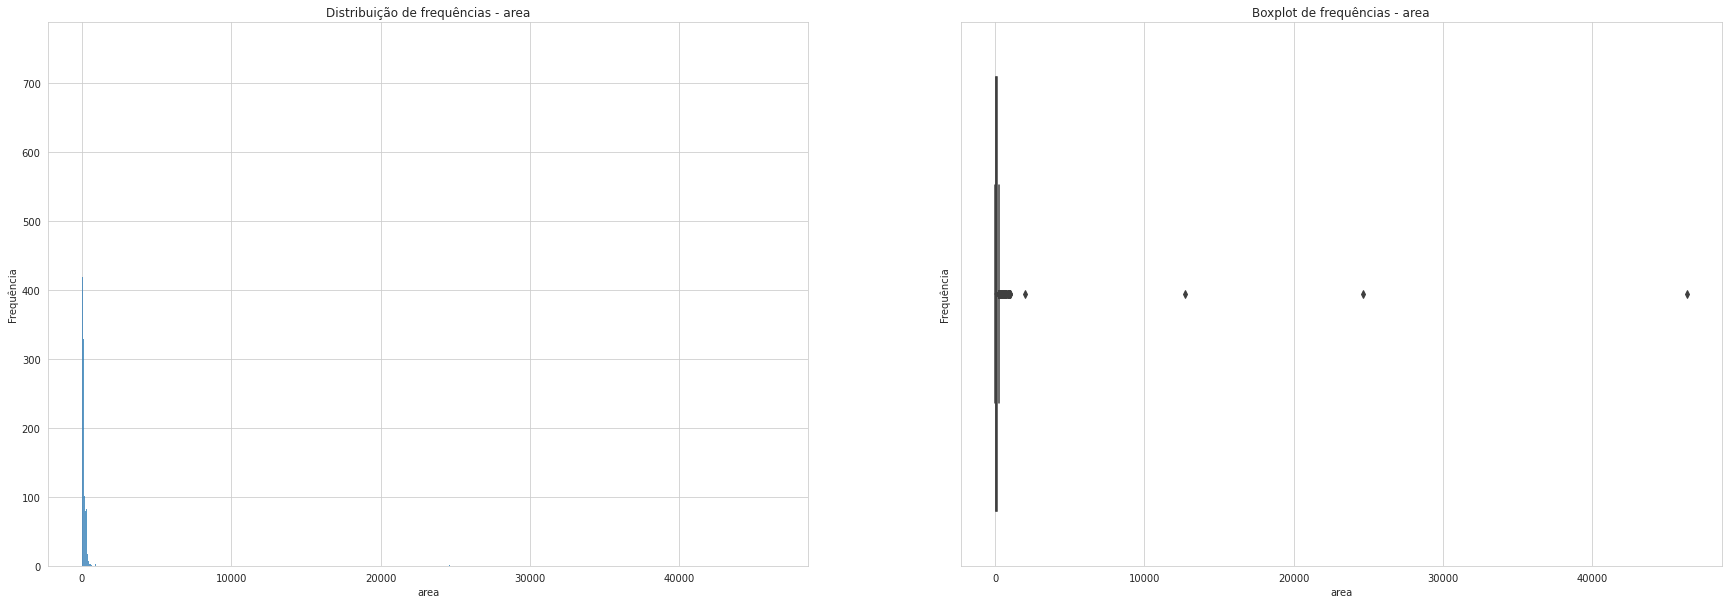

In [ ]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='area')

Está comprovada a exitência de outilers neste atributo. Aliás, o intervalo entre os outliers e a massa de dados é tão grande, que sequer é possível concluir mais sobre os gráficos acima.

Conforme já destacado, o valor máximo registrado no atributo 'área' é absurdamente maior do que a média ou mediana, inclusive, levantando-se a suspeita de que se trata de um erro no registro dos dados, especialmente porque os dados foram obtidos com o uso de crowler.

Como medida:
  - eliminaremos os valores acima de 10000
  - substituiremos os demais outliers pela mediana ou média

Faremos iddo ao fim desta estapa (analise univariada), com os demais atributos que necessitarem de tratamento, e retomares a análise novamente.

Observemos o próximo atributo.

In [ ]:
# Analisando estatísticas iniciais - 'hoa_'

pd.DataFrame(summary.loc['hoa_', ])

,hoa_
count,8.231000e+03
mean,1.484767e+03
std,1.775540e+04
min,0.000000e+00
25%,4.150000e+02
50%,7.500000e+02
75%,1.512500e+03
max,1.117000e+06
unique_values,1.644000e+03


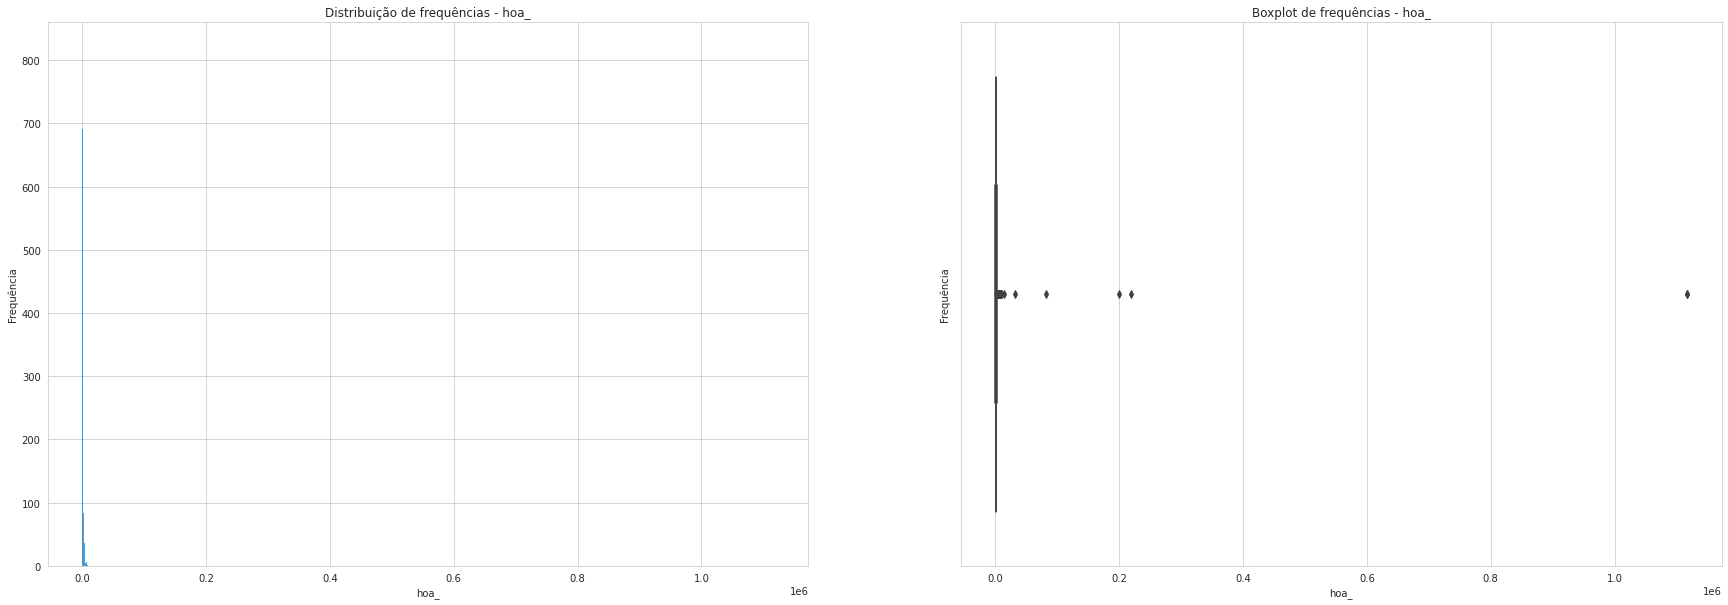

In [ ]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='hoa_')

In [ ]:
# Analisando estatísticas iniciais - 'rent_amount_'

pd.DataFrame(summary.loc['rent_amount_', ])

,rent_amount_
count,8231.000000
mean,3582.276394
std,3138.226949
min,460.000000
25%,1500.000000
50%,2500.000000
75%,4405.000000
max,24000.000000
unique_values,1052.000000


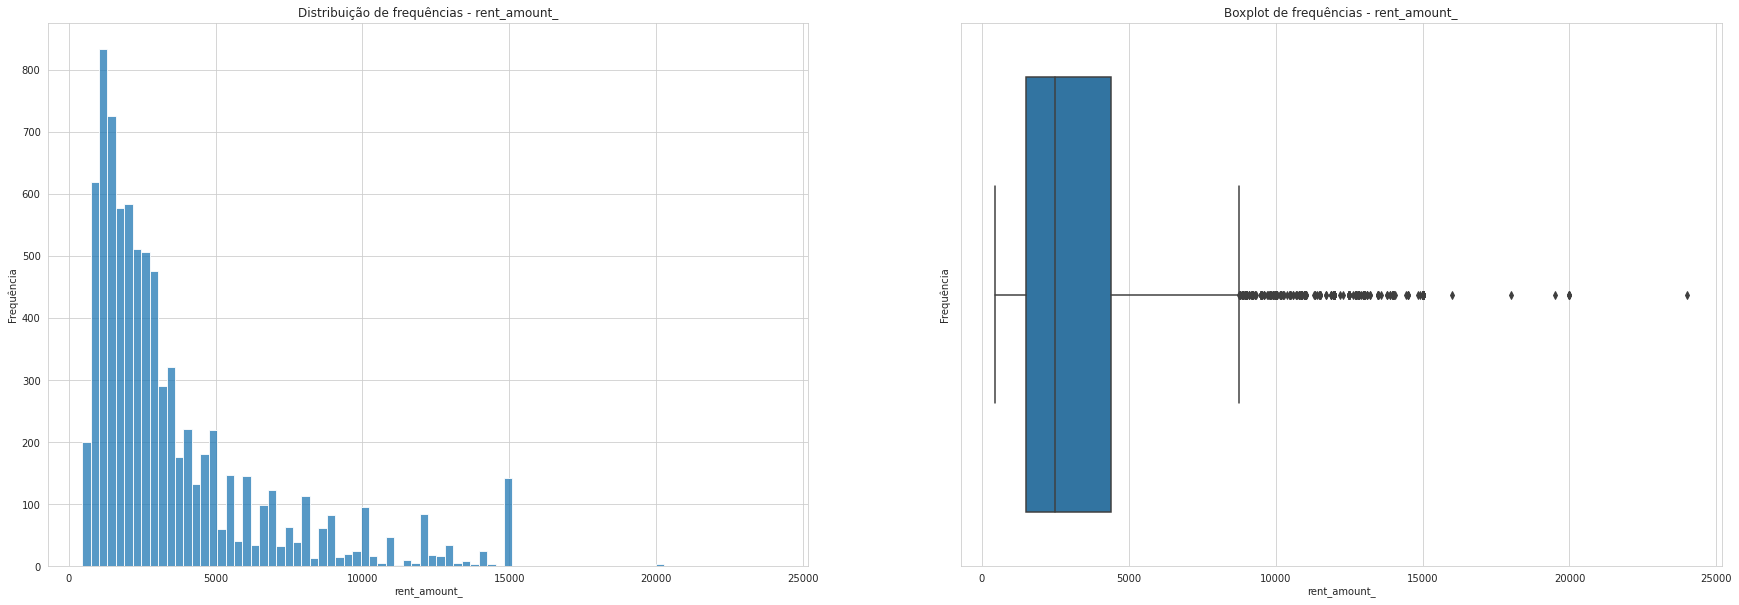

In [ ]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='rent_amount_')

In [ ]:
# Analisando estatísticas iniciais - 'property_tax_'

pd.DataFrame(summary.loc['property_tax_', ])

,property_tax_
count,8231.000000
mean,344.738063
std,3512.011622
min,0.000000
25%,36.000000
50%,112.000000
75%,332.000000
max,313700.000000
unique_values,1077.000000


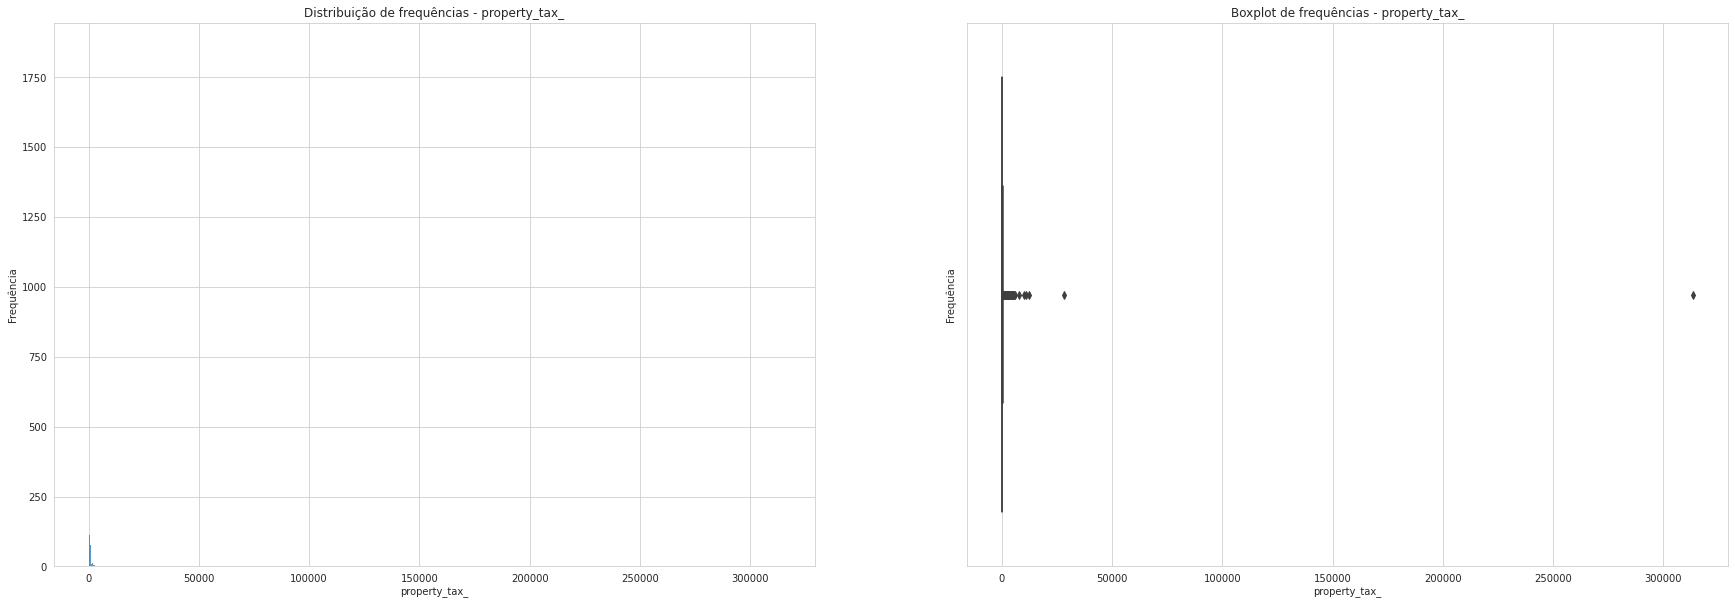

In [ ]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='property_tax_')

In [ ]:
# Analisando estatísticas iniciais - 'fire_insurance_'

pd.DataFrame(summary.loc['fire_insurance_', ])

,fire_insurance_
count,8231.000000
mean,46.455352
std,40.152370
min,3.000000
25%,20.000000
50%,32.000000
75%,58.000000
max,305.000000
unique_values,188.000000


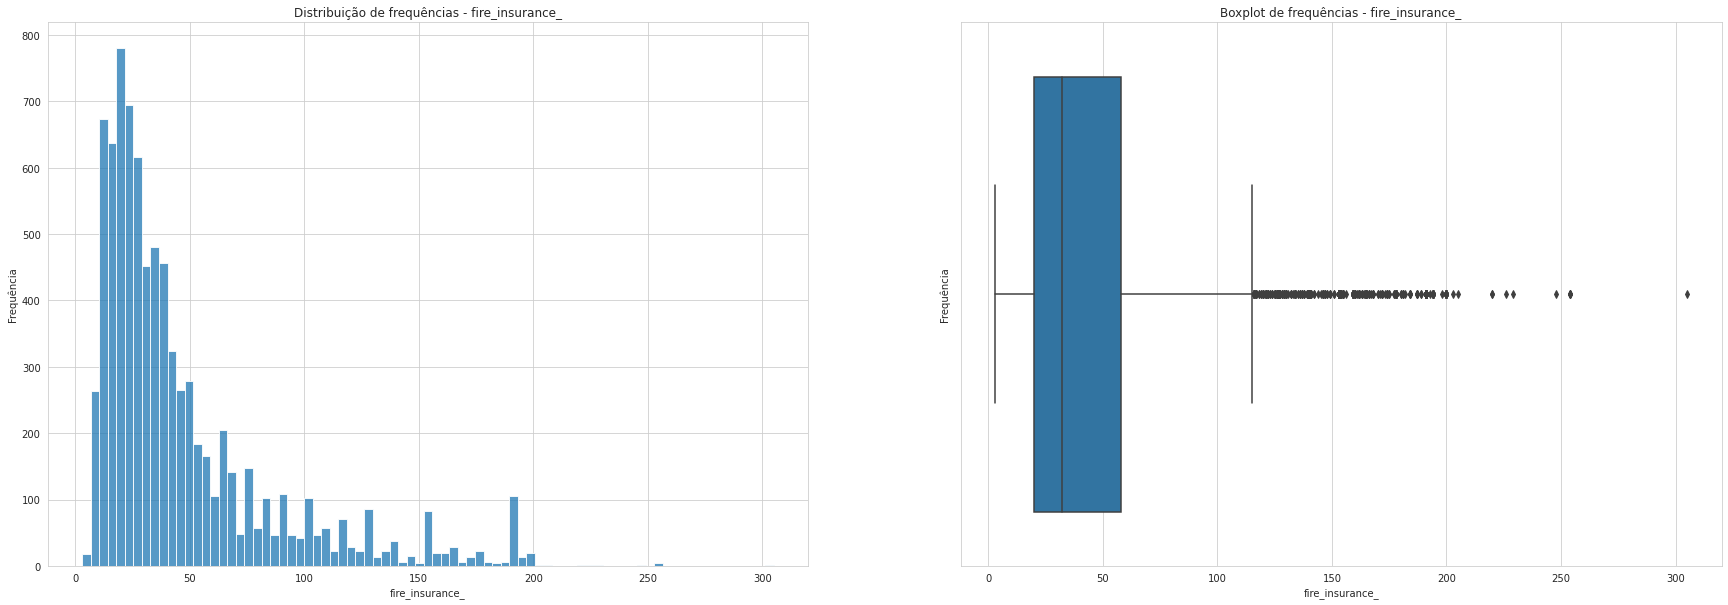

In [ ]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='fire_insurance_')

In [ ]:
# Analisando estatísticas iniciais - 'total_'

pd.DataFrame(summary.loc['total_', ])

,total_
count,8.231000e+03
mean,5.458473e+03
std,1.861053e+04
min,5.070000e+02
25%,2.079000e+03
50%,3.456000e+03
75%,6.394000e+03
max,1.120000e+06
unique_values,4.917000e+03


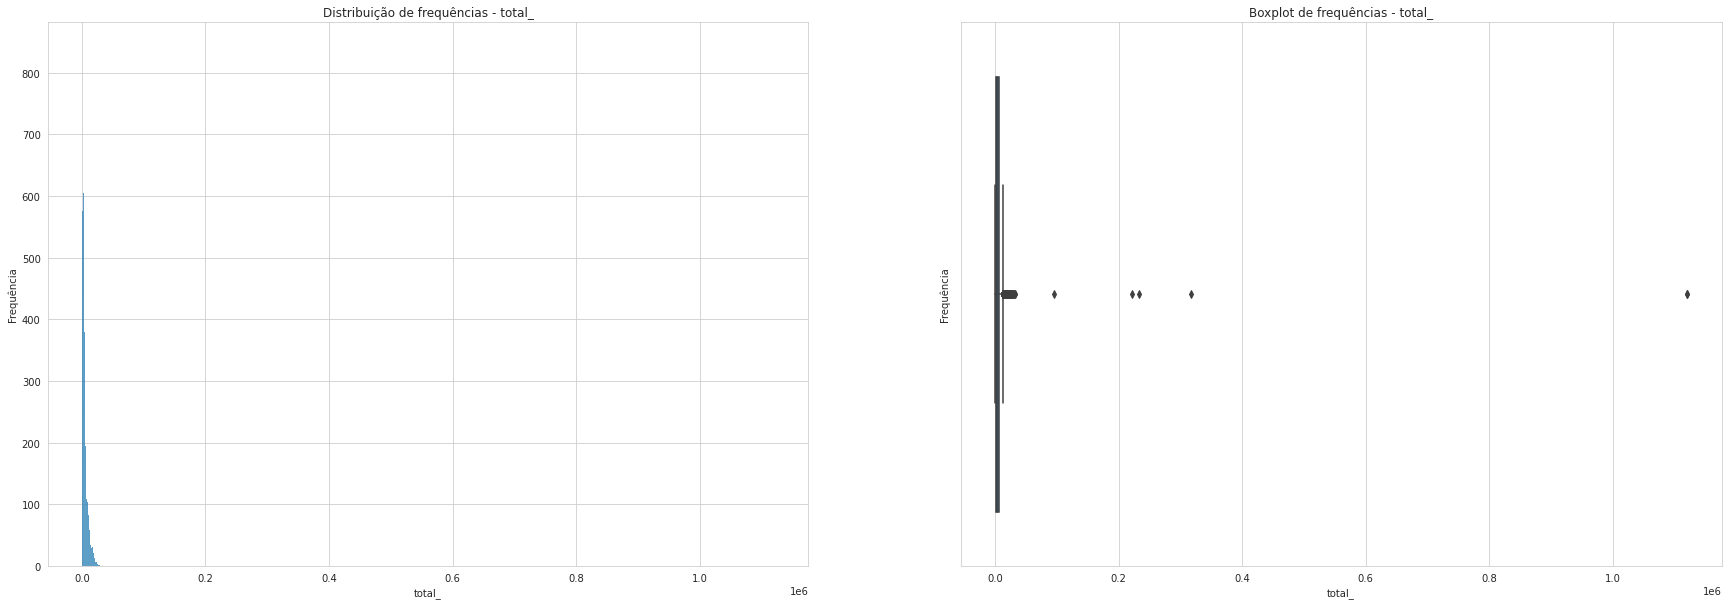

In [ ]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='total_')

Aparentemente, todas as variáveis possuem os mesmos outliers. Isso ocorre pelo provável fato de estarem relacionadas.

Vamos observar se os dados mantém o mesmo comportamente em relação às medidas centrais, bem como à frequência da distribuição, eliminando-se os outliers.

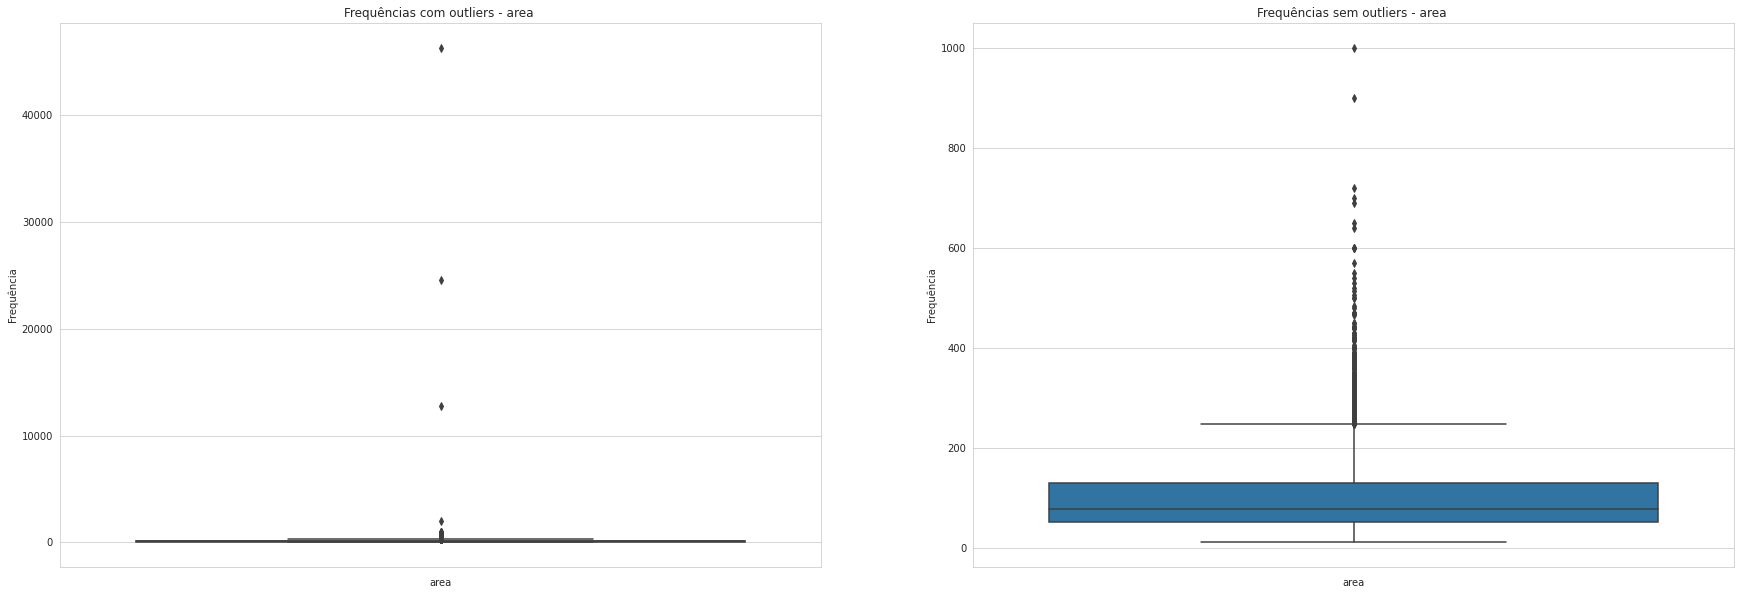

In [ ]:
# Variável 'area'


analise_1.outliers_in_out(coluna = 'area', hist_or_boxplot='boxplot')


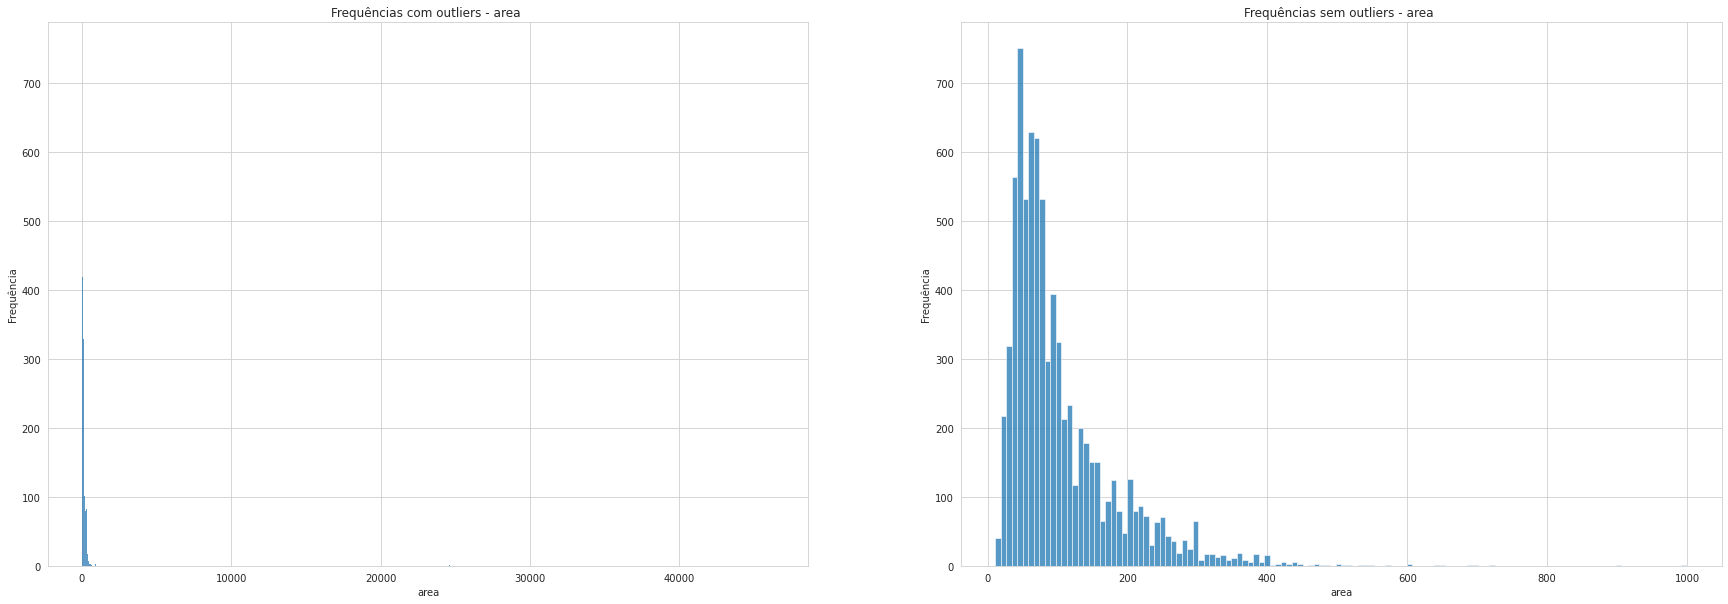

In [ ]:
# Variável 'area'


analise_1.outliers_in_out(coluna = 'area', hist_or_boxplot='hist')

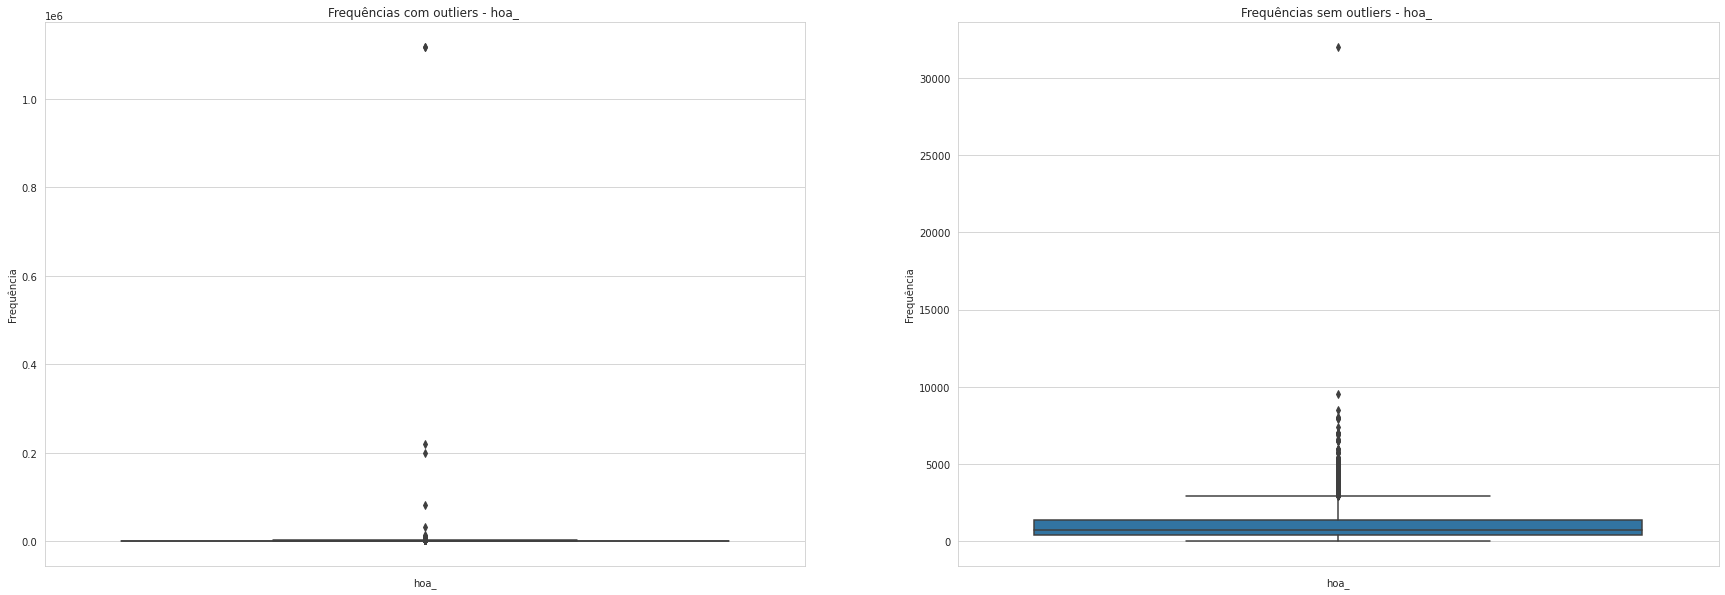

In [ ]:
# Variável 'hoa_'


analise_1.outliers_in_out(coluna = 'hoa_', hist_or_boxplot='boxplot')

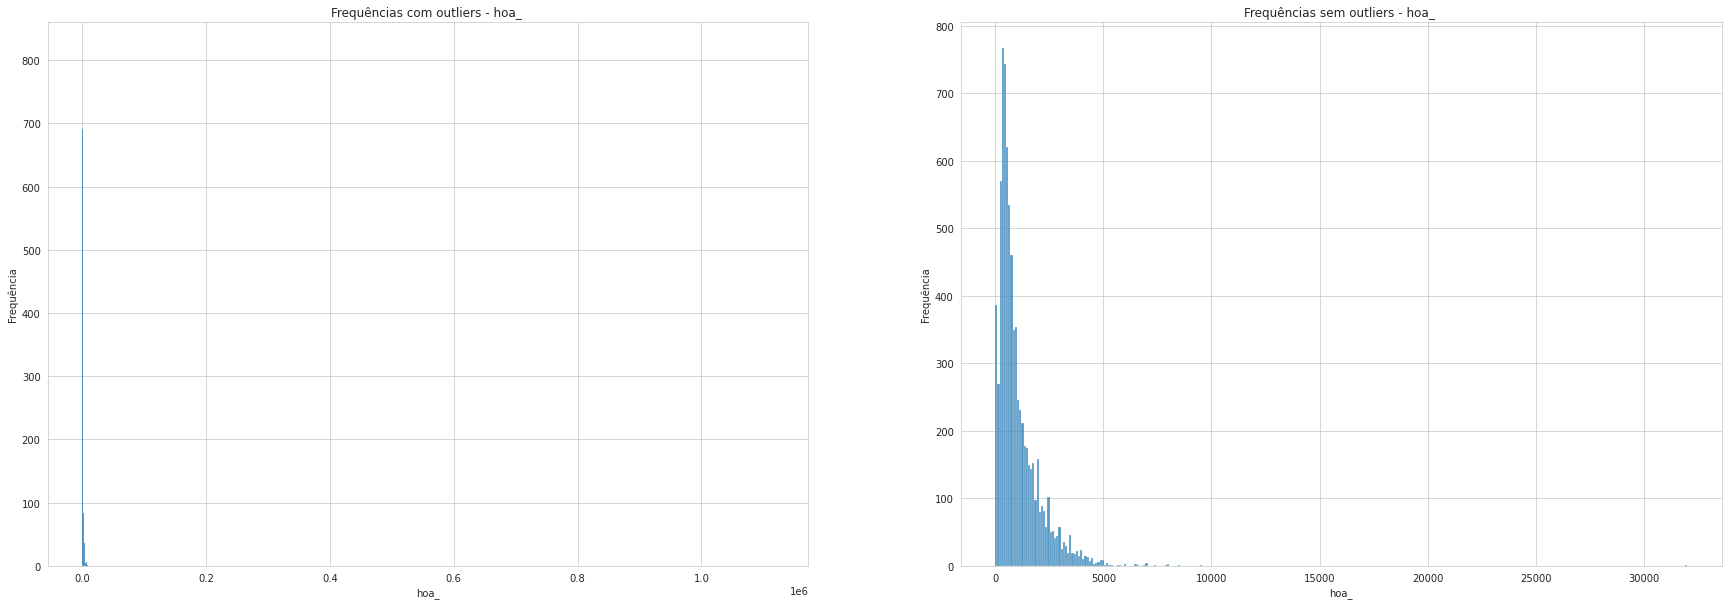

In [ ]:
# Variável 'hoa_'


analise_1.outliers_in_out(coluna = 'hoa_', hist_or_boxplot='hist')

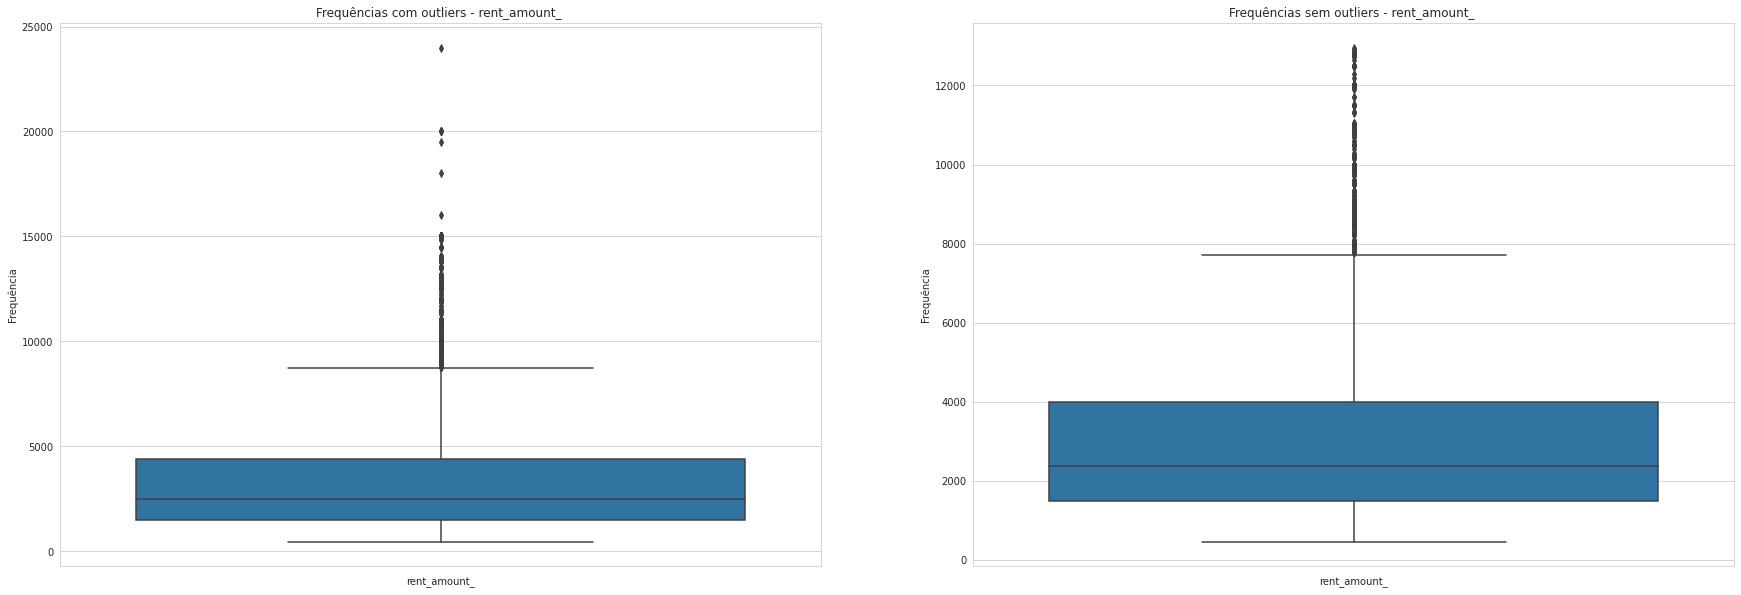

In [ ]:
# Variável 'rent_amount_'


analise_1.outliers_in_out(coluna = 'rent_amount_', hist_or_boxplot='boxplot')

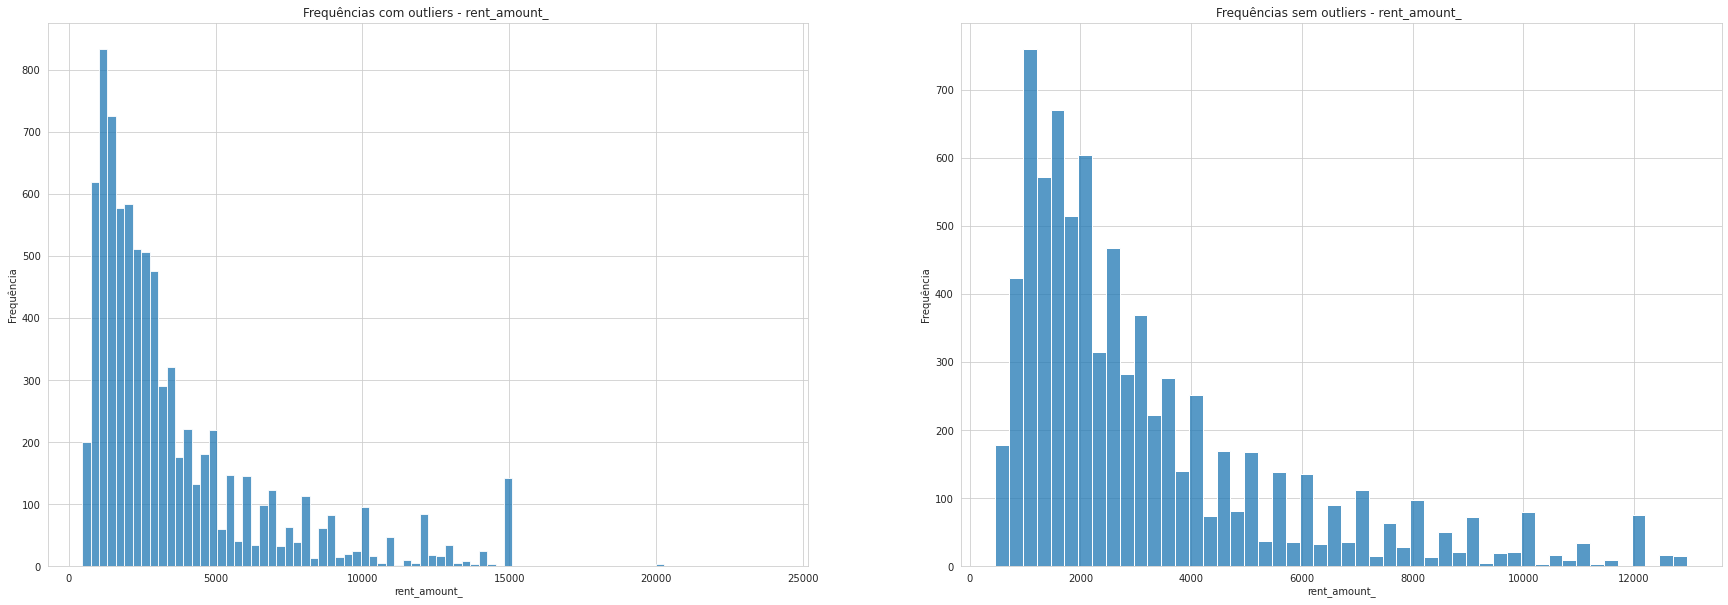

In [ ]:
# Variável 'rent_amount_'


analise_1.outliers_in_out(coluna = 'rent_amount_', hist_or_boxplot='hist')

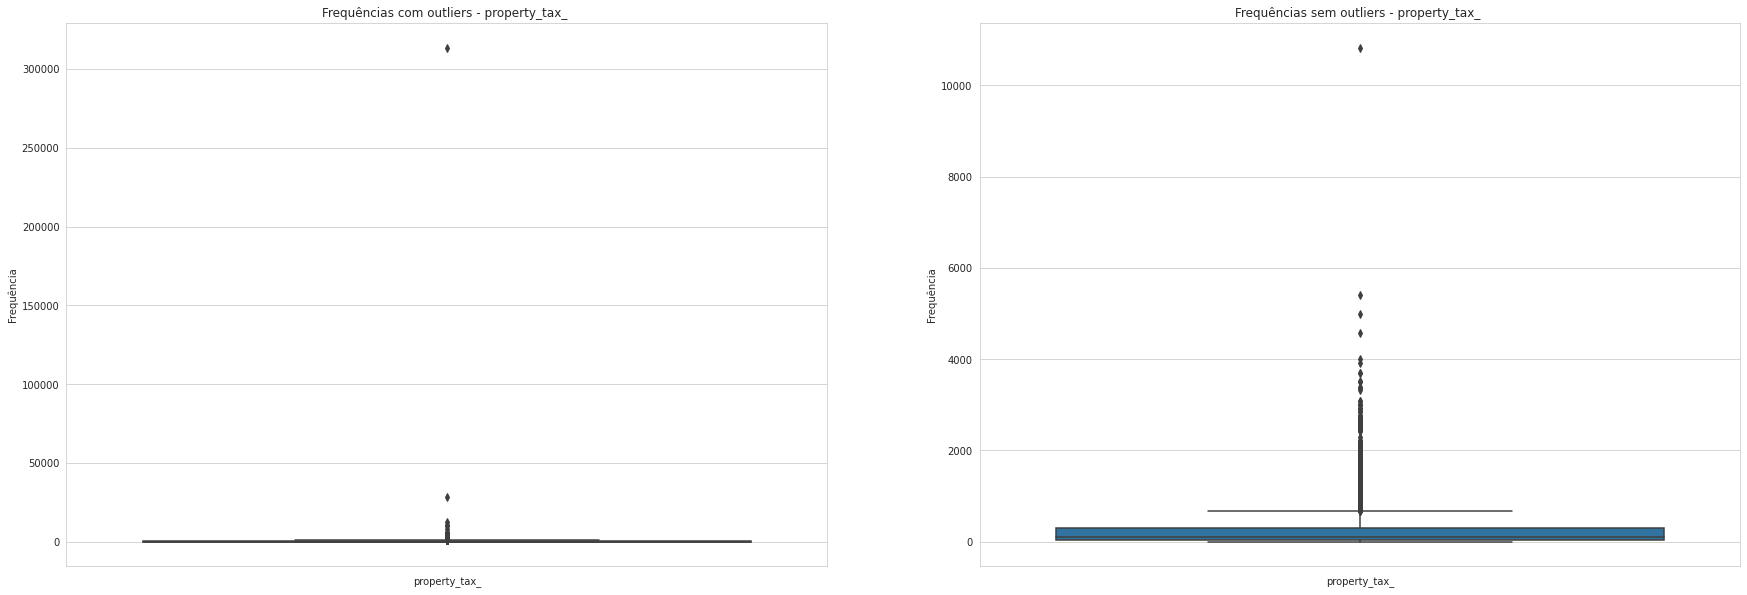

In [ ]:
# Variável 'property_tax_'


analise_1.outliers_in_out(coluna = 'property_tax_', hist_or_boxplot='boxplot')

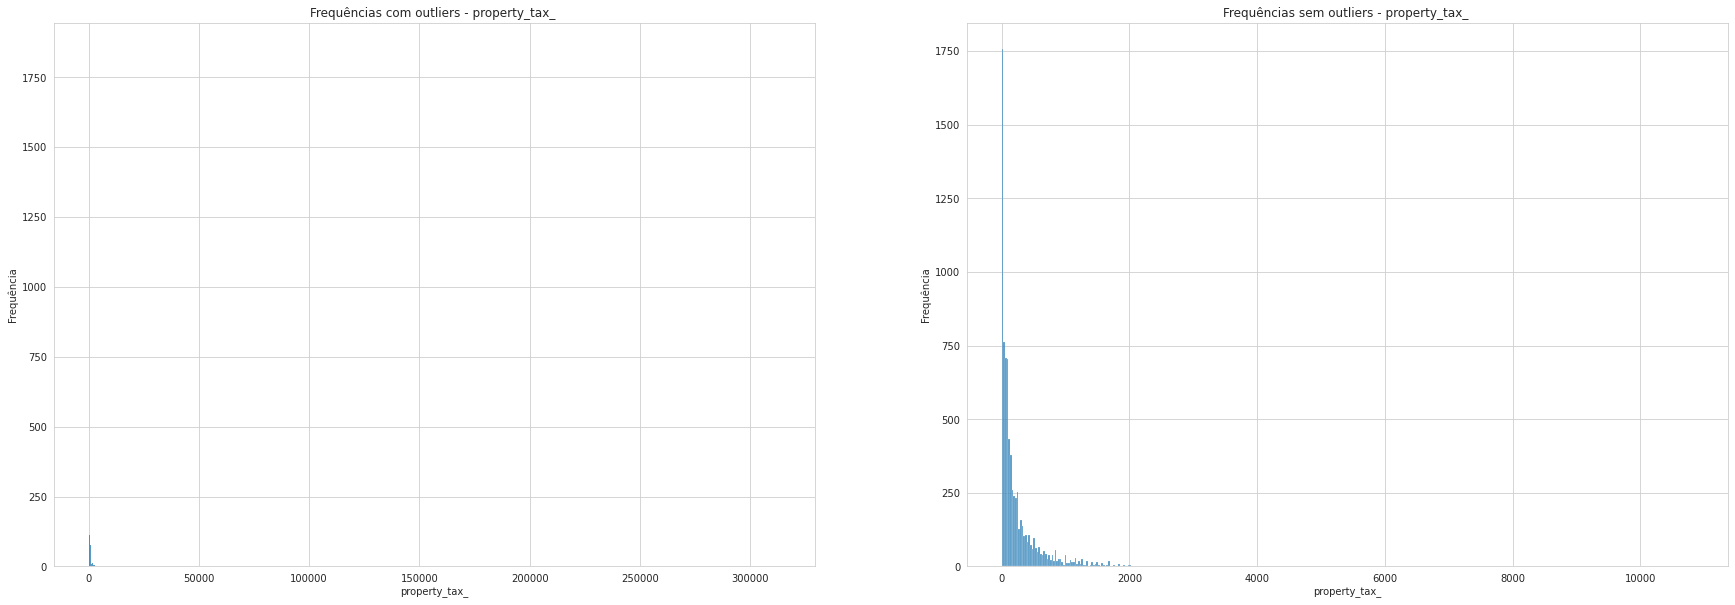

In [ ]:
# Variável 'rent_aproperty_tax_mount_'


analise_1.outliers_in_out(coluna = 'property_tax_', hist_or_boxplot='hist')

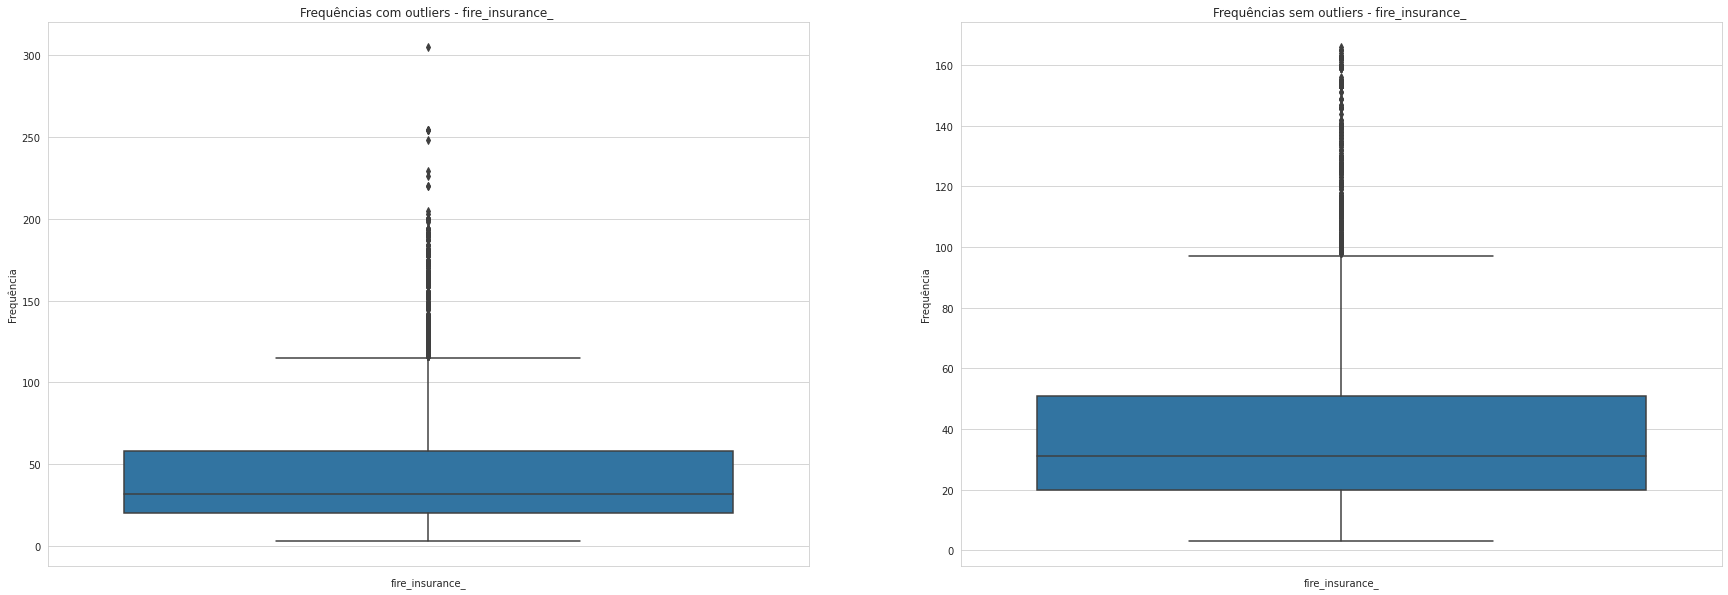

In [ ]:
# Variável 'fire_insurance_'


analise_1.outliers_in_out(coluna = 'fire_insurance_', hist_or_boxplot='boxplot')

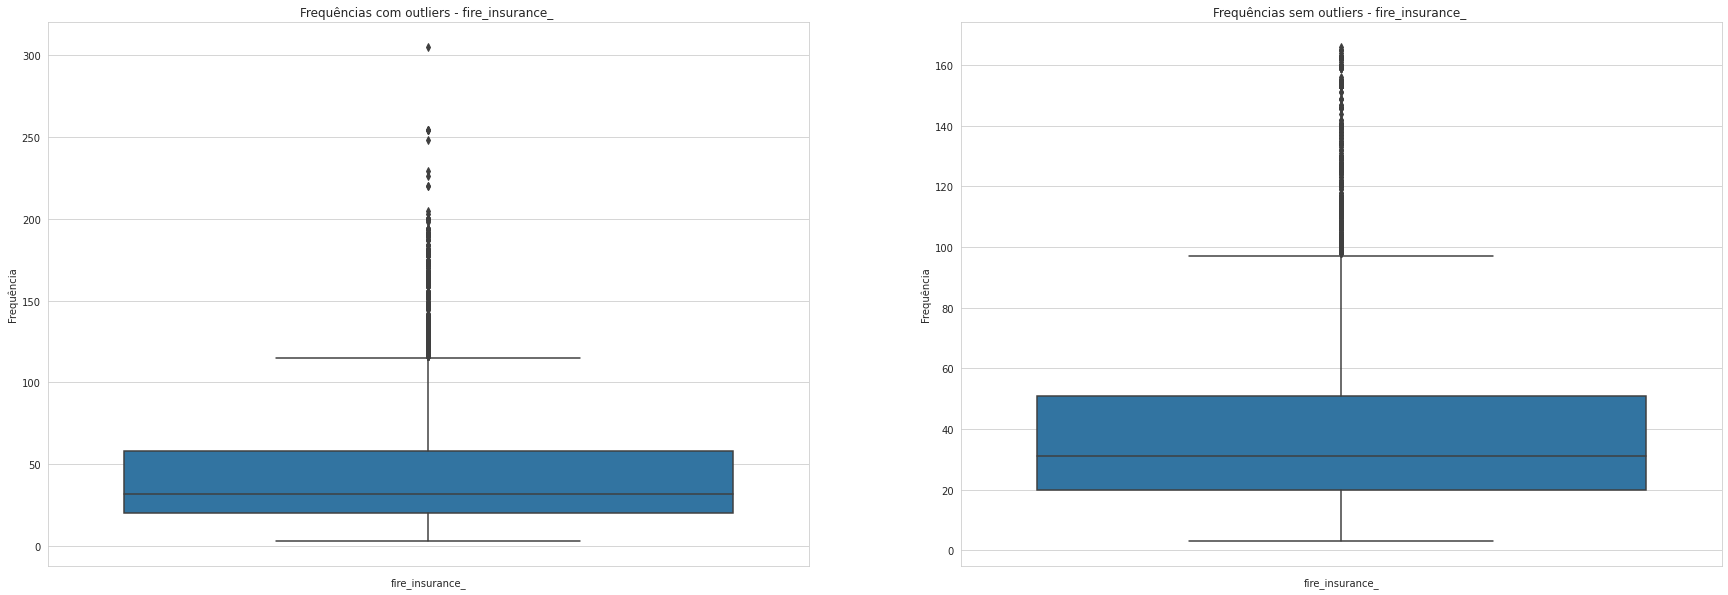

In [ ]:
# Variável 'fire_insurance_'


analise_1.outliers_in_out(coluna = 'fire_insurance_', hist_or_boxplot='boxplot')

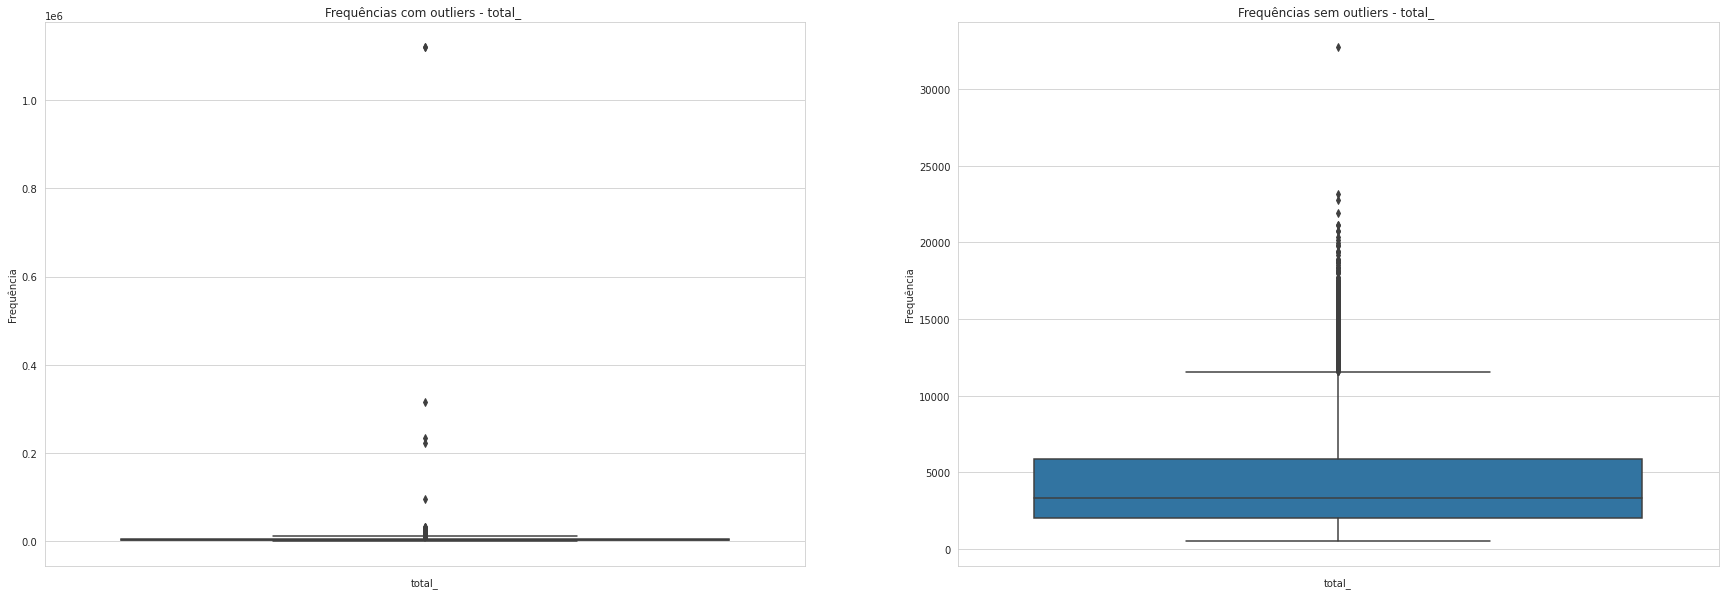

In [ ]:
# Variável 'total_'


analise_1.outliers_in_out(coluna = 'total_', hist_or_boxplot='boxplot')

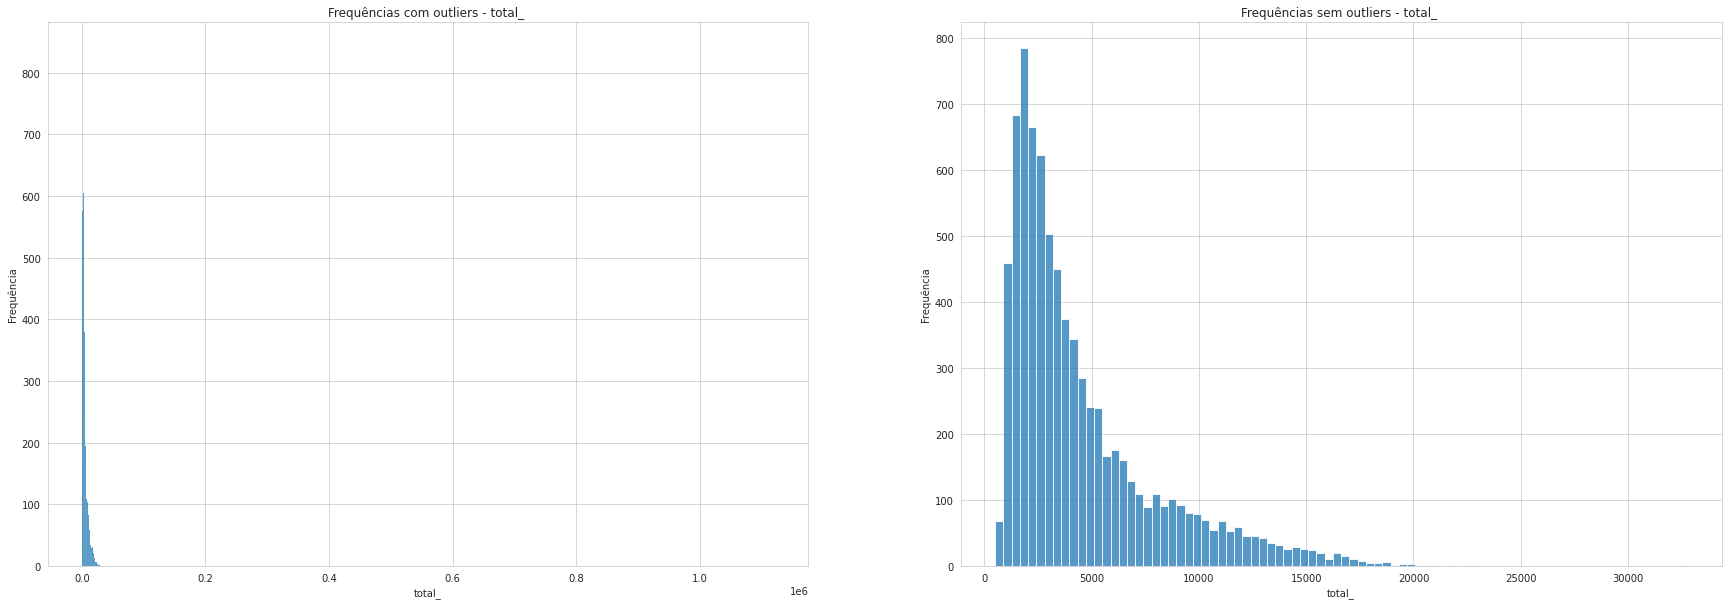

In [ ]:
# Variável 'total_'


analise_1.outliers_in_out(coluna = 'total_', hist_or_boxplot='hist')

Percebe-se que após a eliminação dos outliers (valores à margem de 3 desvios padrão), a visualização dos dados melhora, e concluir que todas as variáveis numéricas contínuas possuem assimetia à ____, novamente, porque devem estar relacionadas.

Desta forma, como medida imediata, vamos utilizar o conjunto de dados sem os outliers, aplicando o atributo 'dataframe_out', resultado de método próprio aplicado ao conjunto de dados instânciado.

In [ ]:
# Reobservando medida descritivas do dataset, com outliers descartados
analise_1.dataframe_out.describe().T.loc[['area', 'hoa_', 'rent_amount_', 'property_tax_', 'fire_insurance_', 'total_'], ]

,count,mean,std,min,25%,50%,75%,max
area,7827.0,104.279417,78.661171,11.0,52.0,78.0,130.0,1000.0
hoa_,7827.0,1050.172224,1023.508062,0.0,400.0,710.0,1400.0,32000.0
rent_amount_,7827.0,3196.012521,2484.363032,460.0,1490.0,2362.0,4000.0,12960.0
property_tax_,7827.0,248.909672,411.311685,0.0,34.0,101.0,292.0,10830.0
fire_insurance_,7827.0,41.509646,31.738111,3.0,20.0,31.0,51.0,166.0
total_,7827.0,4536.809250,3539.091076,507.0,2026.0,3302.0,5848.0,32750.0


A eliminação de outliers se mostrou parcialmente eficaz. Isto porque, ainda se verifica a existência de outliers nos dados, certamente motivada pela grande variabilidada, representada pela média e seus respevtivo desvio padrão.

Contudo, no momento, não tomaremos nenhume medida em relação a estes outliers. Observemos se existe algum padrão que permita melhor visualização, sem mais perda de informação (observe que o dataset já sofrou significativa redução).

## **4. Análise bi-variada**

Vamos observar inicialmente, como a variável de interesse (fire_insurance_) se comportar quando compara com outras.


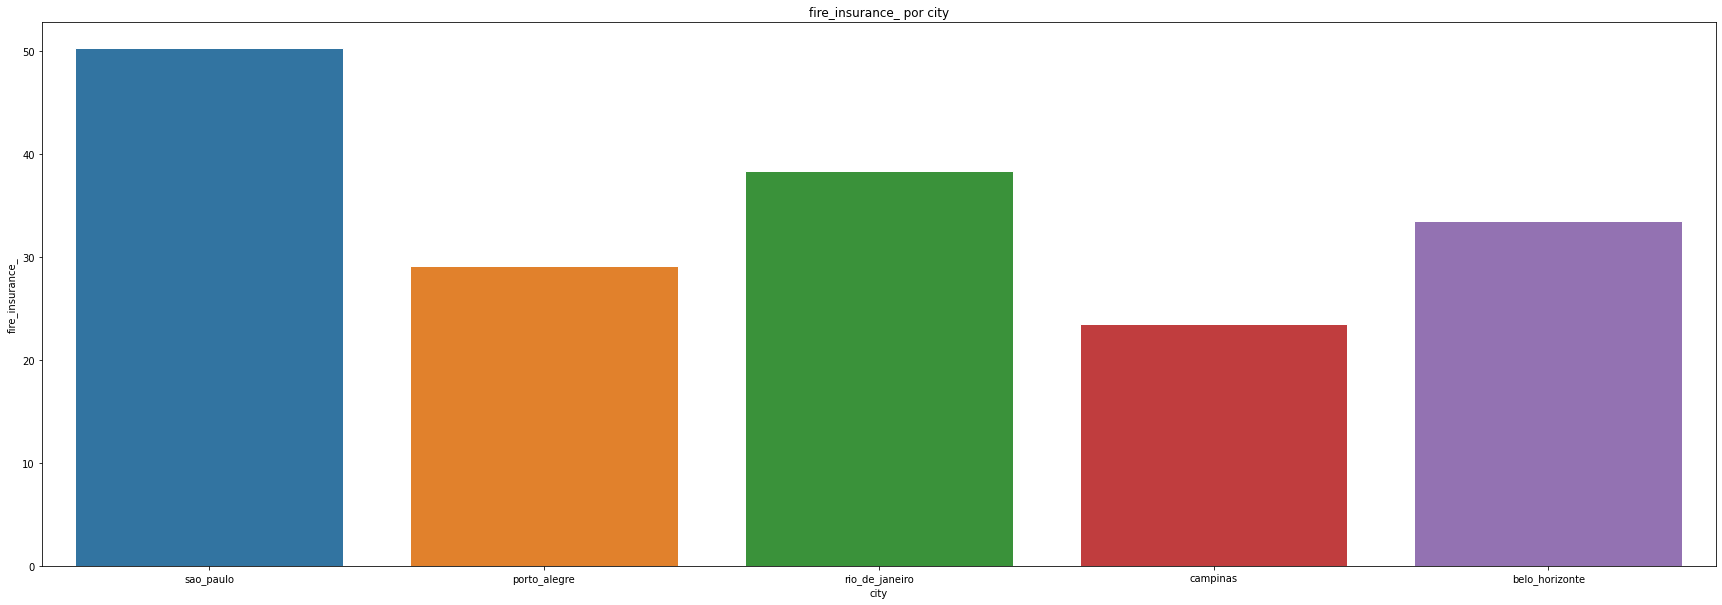

In [ ]:
analise_1.bar_graphic(atributo = 'fire_insurance_', categoria = 'city')

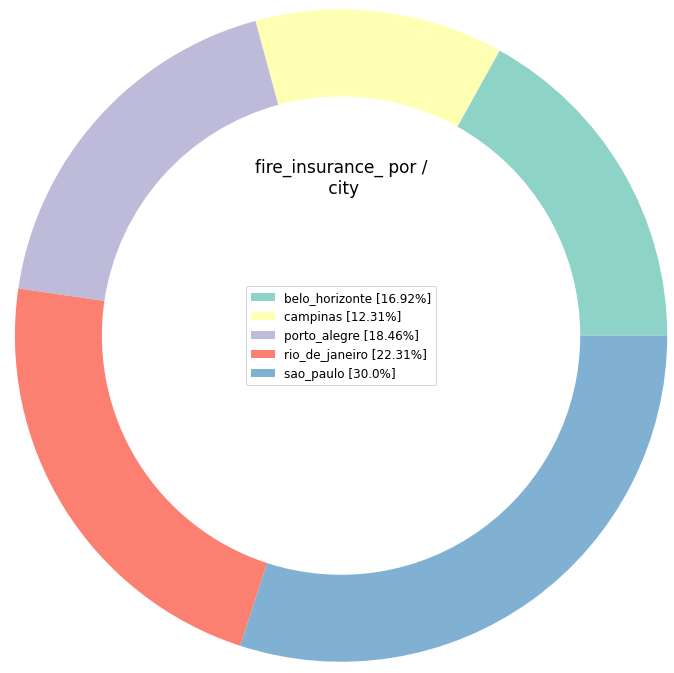

In [ ]:
# Em números relativos, a mediana do valor do seguro nas Cidades de São Paulo e Rio de Janeiro de destacam das demais

analise_1.pie_chart(atributo = 'fire_insurance_', group = 'city', summarise='median')

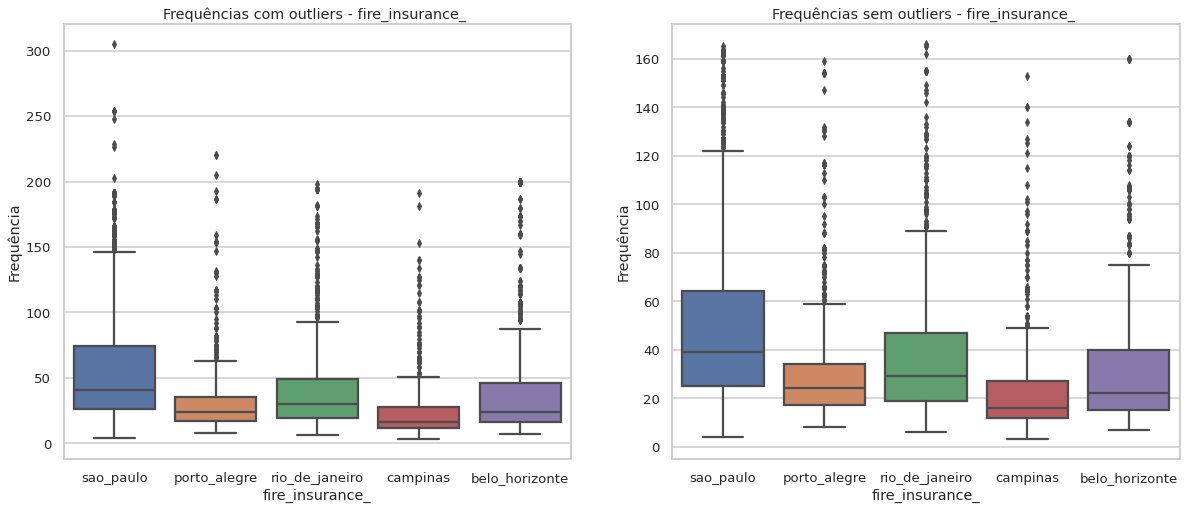

In [ ]:
analise_1.outliers_in_out(coluna = 'fire_insurance_', hist_or_boxplot='boxplot', categoria='city')

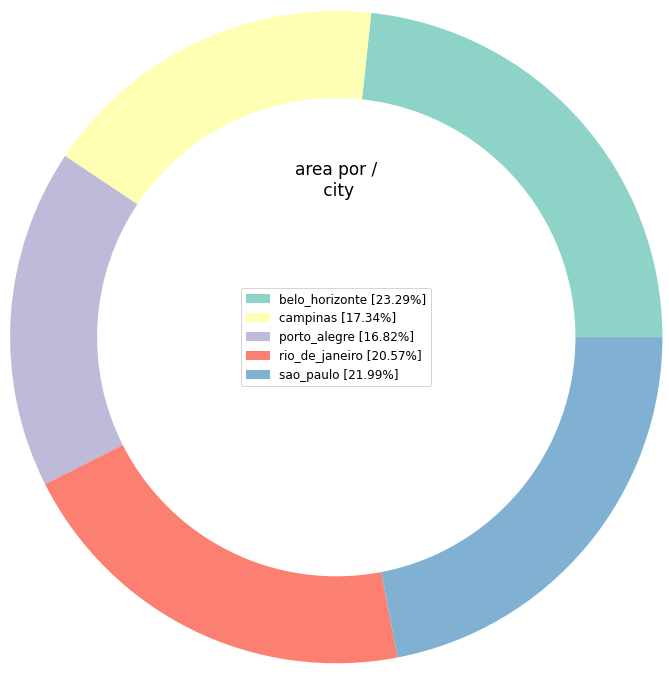

In [ ]:
# Mediana da área por cidade
analise_1.pie_chart(atributo = 'area', group = 'city', summarise='median')

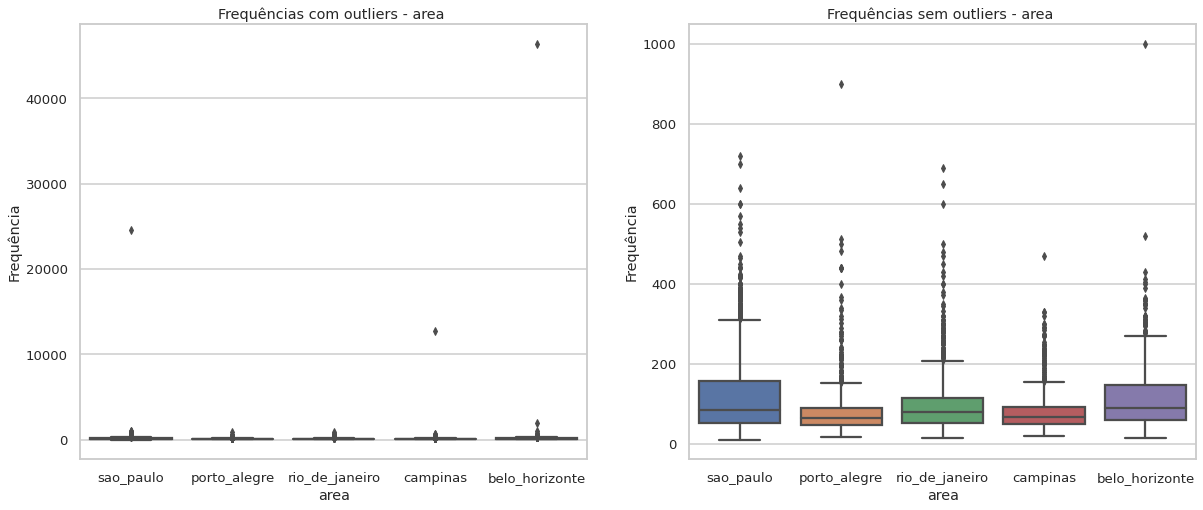

In [ ]:
analise_1.outliers_in_out(coluna = 'area', hist_or_boxplot='boxplot', categoria='city')

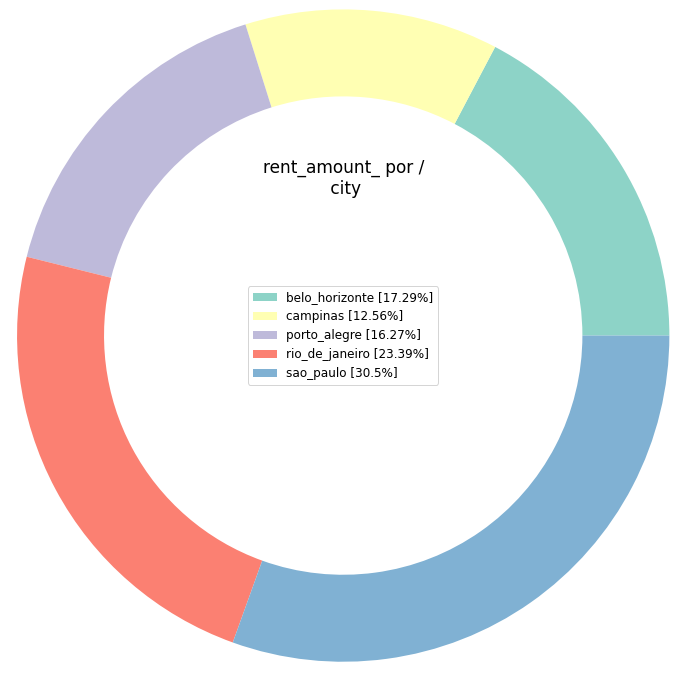

In [ ]:
# Mediana do valor do aluguel por cidade

analise_1.pie_chart(atributo = 'rent_amount_', group = 'city', summarise='median')

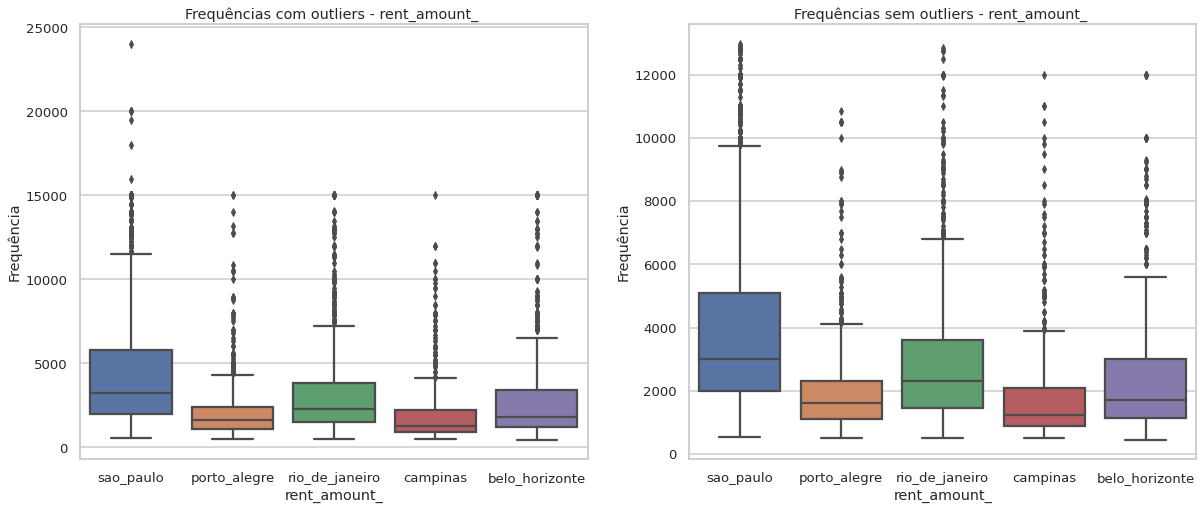

In [ ]:
analise_1.outliers_in_out(coluna = 'rent_amount_', hist_or_boxplot='boxplot', categoria='city')

O gráfico de rosca demonstra que as três variáveis (area, rent_amount_, e fire_insurance_) possuem maiores valores nas cidade de São Paulo e Rio de Janeiro. Iremos investigar uma relação entre esses atributos, bem como, a possível formação de clusters.

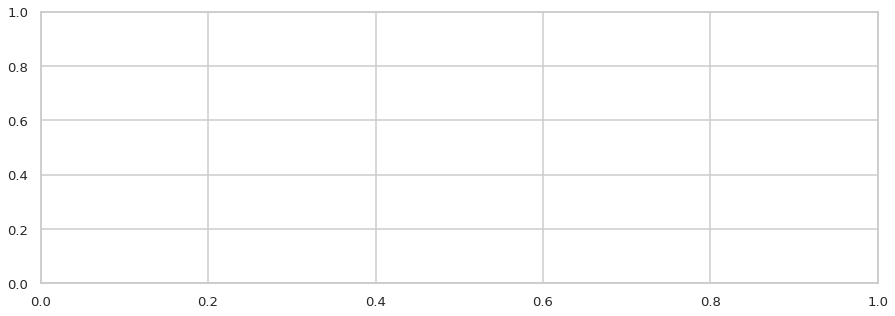

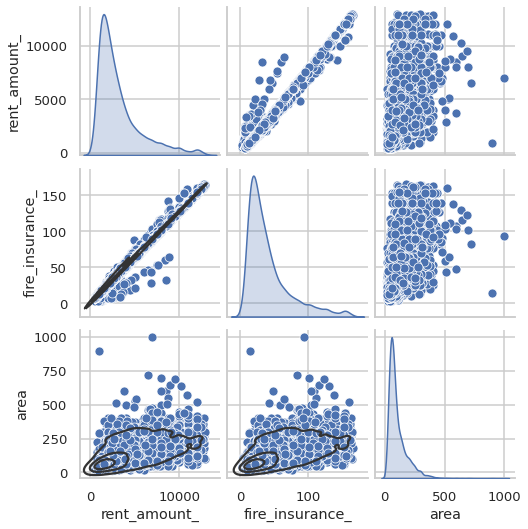

In [ ]:
# Verificando a existência de 

analise_1.pair_plots(atributos=['rent_amount_', 'fire_insurance_', 'area'])

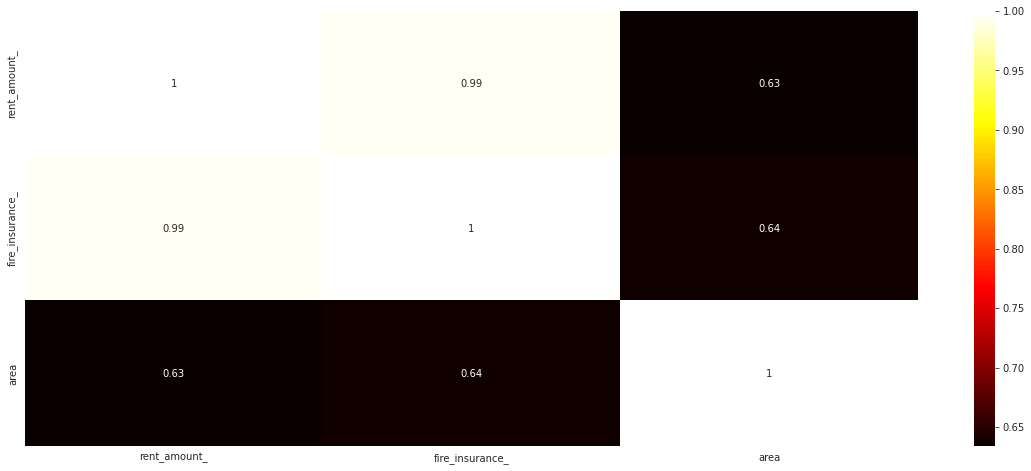

In [ ]:
# Matriz de correlação - coeficiente utilizado é o mais indicado quando as variáveis não possuem distribuição normal

analise_1.cor_matrix(atributos=['rent_amount_', 'fire_insurance_', 'area'], coeficiente='spearman')

Inicialmente, vamos observar a correlação perfeita entre os atributos 'fire_insurance_' e 'rent_amount_'. Uma correlação de 0.99, também evidenciada pelo gráfico acima. Isso sugere que o seguro contra incêndio utiliza o valor do aluguel - ajustado entre locador e locatário -, para calcular o seguro.

Ou seja, após o aluguel ajustada, locador ou locatário procuram um corretor e submetem o contrato para análise, oportunidade em que é calculado o seguro.

Mas, a situação acima demonstrada não resolve o problema de neógicio proposto pela seguradora destinatária desta análise. Observe, A seguradora ___ quer oferecer serviços antes dos concorrentes, se esperar o o negócio entre locador e locatário ser realizado, pode ser tarde demais. Por isso, faz-se necessário encontrar outra forma de calcular o seguro.

No presente caso, observou-se uma correlação entre a área do imóvel, e o seguro. Isso certamente se deve ao fato de que:



1.   A área do imóvel determina o valor do aluguel;
2.   O valor do alugou, por conseguinte, deteminou o valor do seguro.

E aqui está nossa vantagem, apenas com a medida do imóvel, será possível estabelecer o valor provável do seguro praticado pelos concorrentes, conforme este dataset, e, poder-se-á realizar uma proposta melhor do que ofereceriam, antes mesmo de oferecerem!



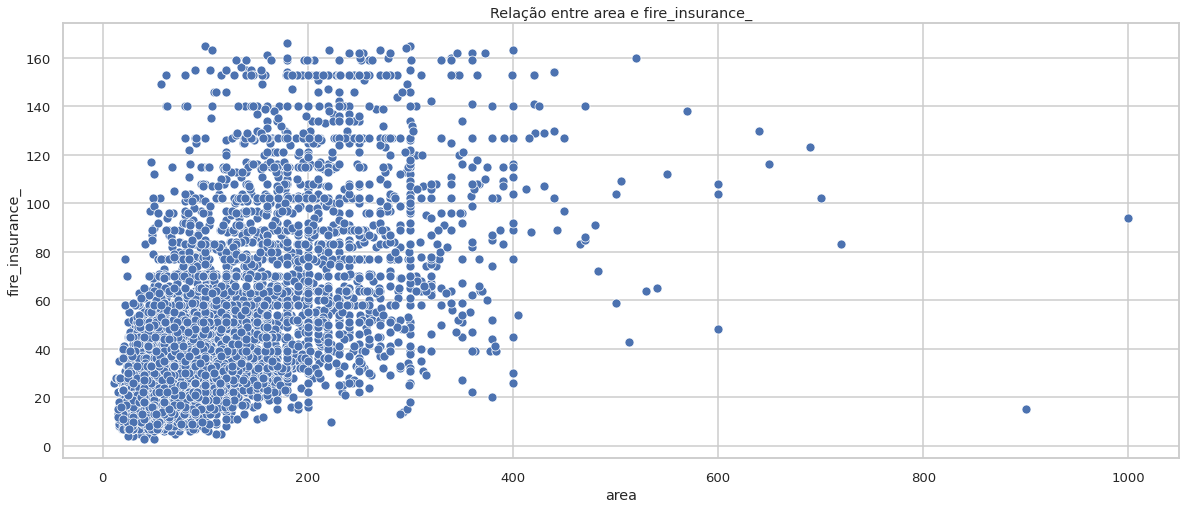

In [ ]:
#correlação

analise_1.scatterplots(x = 'area', y = 'fire_insurance_')

Verificada a relação linear positiva entre as variáveis area e fire_insurance_.

## **5. Observações, conclusões e recomendações**

### Observações:

Trata-se de um conjunto de dados bastante desbalanceado. Em sua composição, mais de 50% dos dados vieram de uma única localidade (São Paulo), fato relevante, visto que as medidas centrais comprovaram haver diferenças significativas entre ...

# **3. Machine learning**

Vamos aplicar inicialmente, um algoritmo de agrupamento (K-means), para isso precisaremos codificar as variáveis categórias.
O agrupamento não demanda que que as variáveis numéricas sejam padronizadas, contudo, após o agrupamento, aplicaremos regressão linear, e, neste caso, padronizar as variáveis é uma boa ideia, visando melhor performance do algoritmo.


In [ ]:
# Verificando shape dos dados

analise_1.dataframe_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7827 entries, 0 to 8230
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             7827 non-null   object 
 1   area             7827 non-null   int64  
 2   rooms            7827 non-null   int64  
 3   bathroom         7827 non-null   int64  
 4   parking_spaces   7827 non-null   int64  
 5   floors           7827 non-null   int64  
 6   animal           7827 non-null   object 
 7   furniture        7827 non-null   object 
 8   hoa_             7827 non-null   float64
 9   rent_amount_     7827 non-null   float64
 10  property_tax_    7827 non-null   float64
 11  fire_insurance_  7827 non-null   float64
 12  total_           7827 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
analise_1.dataframe_out.describe().T

,count,mean,std,min,25%,50%,75%,max
area,7827.0,104.279417,78.661171,11.0,52.0,78.0,130.0,1000.0
rooms,7827.0,2.279928,0.988412,1.0,1.0,2.0,3.0,5.0
bathroom,7827.0,1.940079,1.107954,1.0,1.0,2.0,2.0,5.0
parking_spaces,7827.0,1.255526,1.101015,0.0,0.0,1.0,2.0,5.0
floors,7827.0,6.325540,4.912219,1.0,2.0,5.0,9.0,25.0
hoa_,7827.0,1050.172224,1023.508062,0.0,400.0,710.0,1400.0,32000.0
rent_amount_,7827.0,3196.012521,2484.363032,460.0,1490.0,2362.0,4000.0,12960.0
property_tax_,7827.0,248.909672,411.311685,0.0,34.0,101.0,292.0,10830.0
fire_insurance_,7827.0,41.509646,31.738111,3.0,20.0,31.0,51.0,166.0
total_,7827.0,4536.809250,3539.091076,507.0,2026.0,3302.0,5848.0,32750.0


retomar daqui...quando chama os métodos seguintes, substituir data.dataframeout

In [ ]:
#aplicando padrozização de variáveis

analise_1.standardize(target='fire_insurance_')

In [ ]:
# Visualizando dados padronizados e codificados - exceto a variável target
analise_1.standardized_df

,area,rooms,bathroom,parking_spaces,floors,hoa_,rent_amount_,property_tax_,fire_insurance_,total_,city_sao_paulo_code,city_porto_alegre_code,city_rio_de_janeiro_code,city_campinas_code,city_belo_horizonte_code,animal_acept_code,animal_not_acept_code,furniture_furnished_code,furniture_not_furnished_code
0,-0.435786,-0.283210,-0.848482,-0.232082,0.137303,0.991519,0.041857,-0.092168,42.0,0.305500,1,0,0,0,0,1,0,1,0
1,2.742402,1.740237,1.859212,-1.140335,2.783765,0.146387,0.710036,3.649520,63.0,0.970925,1,0,0,0,0,1,0,0,1
2,-0.308658,-1.294934,-0.848482,-0.232082,-0.066271,-0.049020,-0.159402,-0.605161,41.0,-0.196607,0,1,0,0,0,1,0,0,1
3,-0.677328,-0.283210,-0.848482,-1.140335,-0.880567,-0.762253,-0.838852,-0.551673,17.0,-0.880398,0,1,0,0,0,1,0,0,1
4,-1.007860,-1.294934,-0.848482,-1.140335,-1.084141,-1.026052,-0.964437,-0.544380,11.0,-1.045695,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,-0.079829,-0.283210,-0.848482,-1.140335,-1.084141,-0.478914,0.283367,-0.157811,51.0,0.044698,0,0,1,0,0,1,0,0,1
8225,-0.270520,0.728514,0.054082,0.676171,0.951599,-0.158447,1.740884,-0.067855,96.0,1.183691,1,0,0,0,0,1,0,0,1
8227,-0.524775,-0.283210,-0.848482,-0.232082,-0.269845,-0.633285,-0.691530,-0.546811,22.0,-0.737706,0,1,0,0,0,0,1,1,0
8229,-0.435786,0.728514,0.956647,-1.140335,0.340877,-0.068560,1.128654,0.202013,78.0,0.806193,0,0,1,0,0,0,1,1,0


In [ ]:
analise_1.standardized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7827 entries, 0 to 8230
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   area                          7827 non-null   float64
 1   rooms                         7827 non-null   float64
 2   bathroom                      7827 non-null   float64
 3   parking_spaces                7827 non-null   float64
 4   floors                        7827 non-null   float64
 5   hoa_                          7827 non-null   float64
 6   rent_amount_                  7827 non-null   float64
 7   property_tax_                 7827 non-null   float64
 8   fire_insurance_               7827 non-null   float64
 9   total_                        7827 non-null   float64
 10  city_sao_paulo_code           7827 non-null   int64  
 11  city_porto_alegre_code        7827 non-null   int64  
 12  city_rio_de_janeiro_code      7827 non-null   int64  
 13  cit

Todas as variáves foram convertida para o tipo numérico, permitindo a aplicaçao em algoritmos.

2


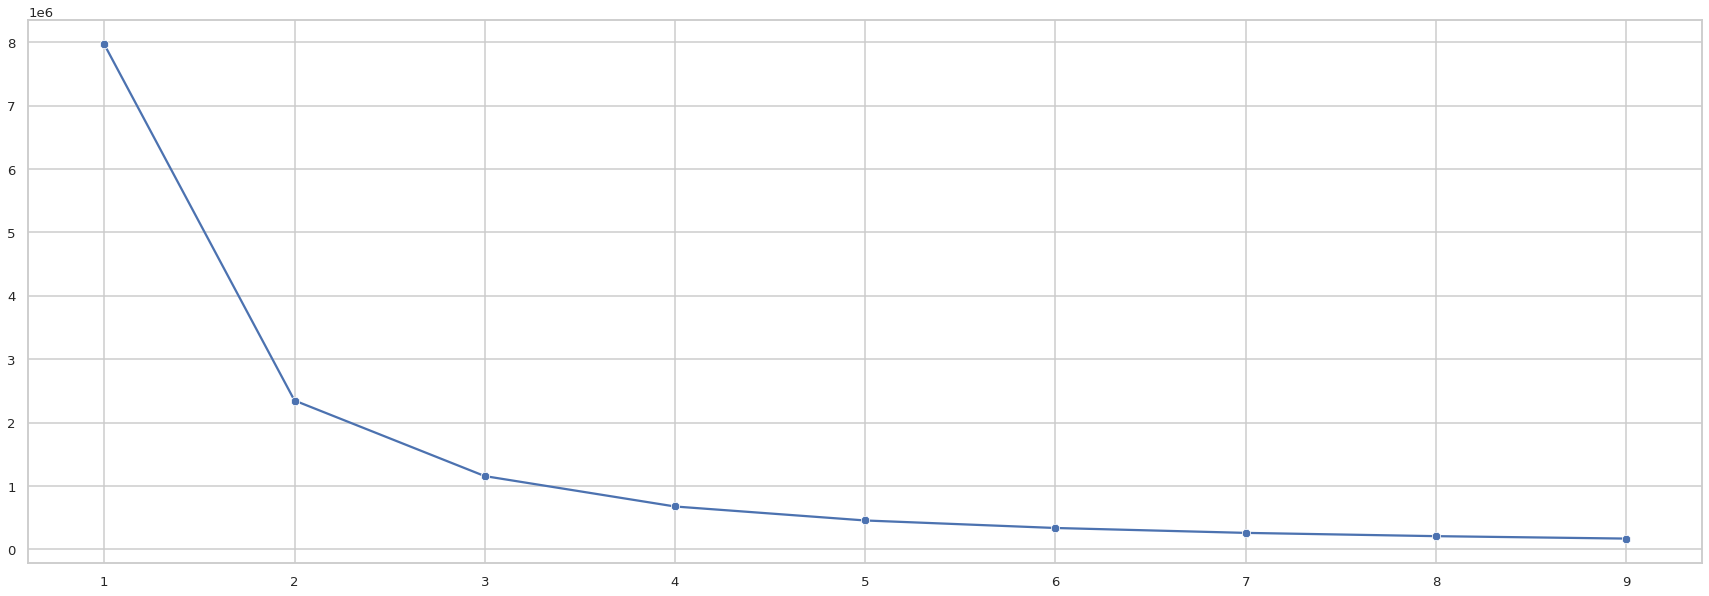

In [ ]:
# Verificando número ideal de clusters

analise_1.elbow_method()

In [ ]:
# Aplicando algoritmo K-Means

analise_1.k_means(clusters = 2)

      cluster
0           1
1           0
2           1
3           1
4           1
...       ...
7822        1
7823        0
7824        1
7825        0
7826        0

[7827 rows x 1 columns]


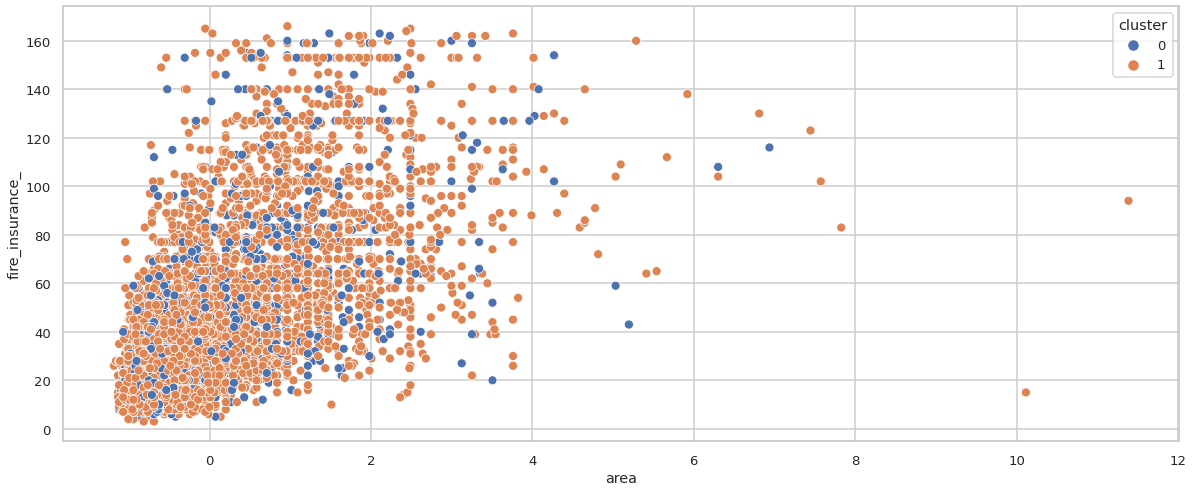

In [ ]:
# Visualizando dados

sns.scatterplot(data = analise_1.clustered_data, x = 'area', y = 'fire_insurance_', hue = 'cluster')

In [ ]:
#regressao

analise_1.bases()

In [ ]:
analise_1.linear_regression()

In [ ]:
analise_1.rmse

2.52

In [ ]:
analise_1.intercepto

41.97368466895544

In [ ]:
analise_1.coeficiente

array([ 2.67804572e-01,  9.80636483e-02, -1.18444394e-01,  4.67724532e-02,
       -4.98627530e-02, -1.78091278e+02, -4.05742233e+02, -7.16046725e+01,
        6.15495363e+02, -1.26082688e+00,  2.45801830e+00, -5.10606674e-01,
       -8.93957729e-01,  2.07372987e-01,  5.15105827e-03, -5.15105829e-03,
        1.69318966e-02, -1.69318966e-02])